In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression # untuk  pemodelan dengan logistic regression
from sklearn.neighbors import KNeighborsClassifier # untuk pemodelan dengan K Neighbors Classifier 
from sklearn.ensemble import RandomForestClassifier # untuk pemodelan dengan Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # untuk pemodelan dengan Decision Tree Classifier
from sklearn.svm import SVC # untuk pemodelan dengan Support Vector Machine dengan tipe Classification
from xgboost import XGBClassifier # untuk pemodelan dengan XGBoost (Extreme Gradient Boosting) untuk tipe Classification
from sklearn.ensemble import  AdaBoostClassifier # untuk pemodelan dengan Adaptive Boosting untuk tipe Classification

from sklearn.model_selection import train_test_split # untuk spliting dataset menjadi train dan test sebagai bagian pemodelan
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score # untuk analisis akurasi, F1, recall, dan precision jika analisis dengan classification report mengalami masalah
from sklearn.metrics import classification_report, confusion_matrix # mengimport package tentang classification report dan confusion matrix
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc # ROC : receiver operating characteristic; AUC = Area under curve; Hindari AUC bernilai 0.5 ke bawah; 0.7 sudah bagus
import statsmodels.api as sm # mengimport package tentang statsmodels untuk analisa sebuah model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, MinMaxScaler, StandardScaler # mengimport package tentang scaling sebagai bagian dari feature engineering

from sklearn.model_selection import GridSearchCV # mengimport package tentang GridSearchCV untuk hyper parameter tuning dan cross validation (CV)

# untuk mempermudah pemodelan dengan data yang berkategori numerical dan categorical, pipeline dapat digunakan.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Jika data bersifat imbalanced, beberapa package berikut dapat diimport untuk meng-handle imbalanced data
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Untuk mengekspor dataset ke dashboard
import pickle
import joblib

%matplotlib inline

pd.options.display.max_columns = 999 # biar koloom tidak ada titik2, ditampilkan semua
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format='{:,}'.format

import xgboost as xgb

In [2]:
df = pd.read_csv("C:/Users/ASUS/visual_studio_code/final_project/dataset/bank-additional-full_clean.csv", index_col =0)
df.head()

,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,261,999,0,nonexistent,1.1,4.857,"5,191.0",no
1,149,999,0,nonexistent,1.1,4.857,"5,191.0",no
2,226,999,0,nonexistent,1.1,4.857,"5,191.0",no
3,151,999,0,nonexistent,1.1,4.857,"5,191.0",no
4,307,999,0,nonexistent,1.1,4.857,"5,191.0",no


In [3]:
df_dummy = df.copy()
df_dummy.head()

,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,261,999,0,nonexistent,1.1,4.857,"5,191.0",no
1,149,999,0,nonexistent,1.1,4.857,"5,191.0",no
2,226,999,0,nonexistent,1.1,4.857,"5,191.0",no
3,151,999,0,nonexistent,1.1,4.857,"5,191.0",no
4,307,999,0,nonexistent,1.1,4.857,"5,191.0",no


In [4]:
df_dummy = pd.get_dummies(data=df_dummy, columns=['poutcome'])

In [5]:
df_dummy['y'] = df_dummy['y'].map({'no' : 0, 'yes' : 1})

In [6]:
df_dummy.head()

,duration,pdays,previous,emp.var.rate,euribor3m,nr.employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success
0,261,999,0,1.1,4.857,"5,191.0",0,0,1,0
1,149,999,0,1.1,4.857,"5,191.0",0,0,1,0
2,226,999,0,1.1,4.857,"5,191.0",0,0,1,0
3,151,999,0,1.1,4.857,"5,191.0",0,0,1,0
4,307,999,0,1.1,4.857,"5,191.0",0,0,1,0


# Data Splitting and Handle Imbalanced Data

In [7]:
X = df.drop(columns='y')
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2, random_state=42)

In [8]:
X_dummy = df_dummy.drop(columns='y')
y_dummy = df_dummy.y

X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_dummy, y_dummy, stratify = y_dummy, test_size = .2, random_state=42)

## 1. Oversampling

In [9]:
X = pd.concat([X_train_dummy, y_train_dummy], axis = 1)

In [10]:
X.head()

,duration,pdays,previous,emp.var.rate,euribor3m,nr.employed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
25611,227,999,0,-0.1,4.12,"5,195.8",0,1,0,0
26010,202,999,1,-0.1,4.12,"5,195.8",1,0,0,0
40194,1148,999,0,-1.7,0.87,"4,991.6",0,1,0,1
297,120,999,0,1.1,4.857,"5,191.0",0,1,0,0
36344,368,999,0,-2.9,1.262,"5,076.2",0,1,0,0


In [11]:
marketting_no = X[X.y == 0]
marketting_yes = X[X.y == 1]

In [12]:
X.y.value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [13]:
marketting_oversample = resample(marketting_yes, 
                            replace=True,
                            n_samples = len(marketting_no),
                            random_state = 42
)

In [14]:
oversampled = pd.concat([marketting_no, marketting_oversample])

In [15]:
oversampled.y.value_counts()

1    29238
0    29238
Name: y, dtype: int64

In [16]:
X_train_dummy2 = oversampled.drop(columns="y")
y_train_dummy2 = oversampled.y

## K Neighbors Classifier - Oversampling

In [17]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy2)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyKNN_oversample = KNeighborsClassifier()

params_dummyKNN = {
    "n_neighbors" : range(1,50,2),
    "weights" : ["uniform", "distance"],
    "p" : [2, 1]
}

model_dummyKNN_oversample = GridSearchCV(model_dummyKNN_oversample, params_dummyKNN, cv=3, n_jobs=-1, verbose=1)

model_dummyKNN_oversample.fit(X_train_robustscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.5min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50, 2), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [18]:
y_pred_dummy_KNNrobust_oversample = model_dummyKNN_oversample.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_KNNrobust_oversample))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      7310
           1       0.27      0.79      0.40       928

    accuracy                           0.74      8238
   macro avg       0.62      0.76      0.62      8238
weighted avg       0.89      0.74      0.78      8238



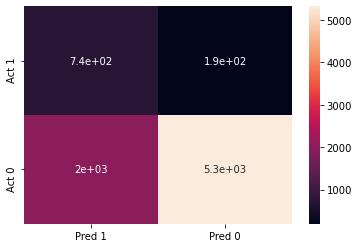

In [19]:
cm_KNNrobust_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_KNNrobust_oversample, labels=[1, 0]) 
df_cm_KNNrobust_oversample = pd.DataFrame(cm_KNNrobust_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_KNNrobust_oversample, annot=True)

In [20]:
roc_auc_score(y_test_dummy, y_pred_dummy_KNNrobust_oversample)

0.7612492039718854

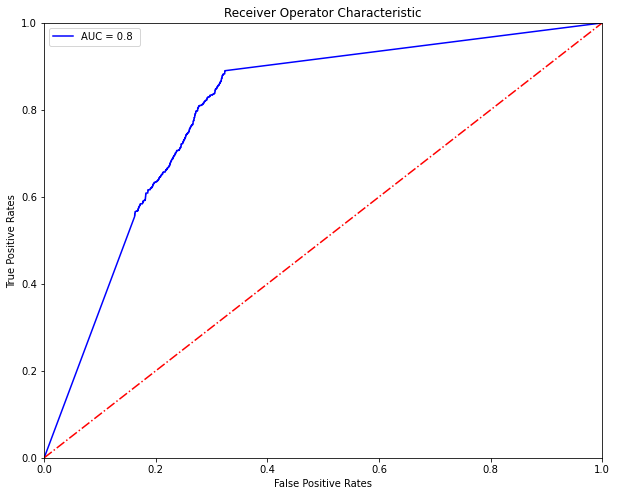

In [21]:
probs = model_dummyKNN_oversample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [22]:
model_dummyKNN_oversample.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [23]:
model_dummyKNN_oversample.best_score_

0.9420445994938094

In [28]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy2)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyKNN_oversample2 = KNeighborsClassifier()

params_dummyKNN = {
    "n_neighbors" : range(1,50,2),
    "weights" : ["uniform", "distance"],
    "p" : [2, 1]
}

model_dummyKNN_oversample2 = GridSearchCV(model_dummyKNN_oversample2, params_dummyKNN, cv=3, n_jobs=-1, verbose=1)

model_dummyKNN_oversample2.fit(X_train_minmaxscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50, 2), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [29]:
y_pred_dummy_KNNminmax_oversample = model_dummyKNN_oversample2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_KNNminmax_oversample))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7310
           1       0.43      0.61      0.50       928

    accuracy                           0.86      8238
   macro avg       0.69      0.75      0.71      8238
weighted avg       0.89      0.86      0.87      8238



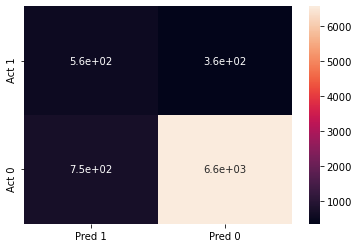

In [30]:
cm_KNNminmax_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_KNNminmax_oversample, labels=[1, 0]) 
df_cm_KNNminmax_oversample = pd.DataFrame(cm_KNNminmax_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_KNNminmax_oversample, annot=True)

In [31]:
roc_auc_score(y_test_dummy, y_pred_dummy_KNNminmax_oversample)

0.7525797207415444

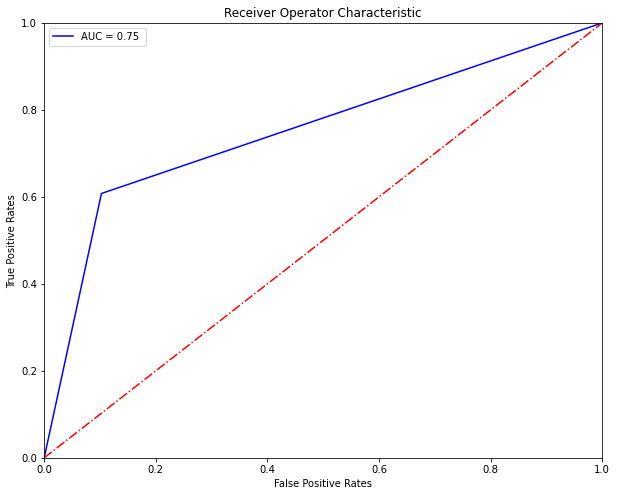

In [32]:
probs = model_dummyKNN_oversample2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [33]:
model_dummyKNN_oversample2.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [34]:
model_dummyKNN_oversample2.best_score_

0.9458752308639443

In [35]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy2)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyKNN_oversample3 = KNeighborsClassifier()

params_dummyKNN = {
    "n_neighbors" : range(1,50,2),
    "weights" : ["uniform", "distance"],
    "p" : [2, 1]
}

model_dummyKNN_oversample3 = GridSearchCV(model_dummyKNN_oversample3, params_dummyKNN, cv=3, n_jobs=-1, verbose=1)

model_dummyKNN_oversample3.fit(X_train_standardscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50, 2), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [36]:
y_pred_dummy_KNNstandard_oversample = model_dummyKNN_oversample3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_KNNstandard_oversample))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7310
           1       0.34      0.53      0.42       928

    accuracy                           0.83      8238
   macro avg       0.64      0.70      0.66      8238
weighted avg       0.87      0.83      0.85      8238



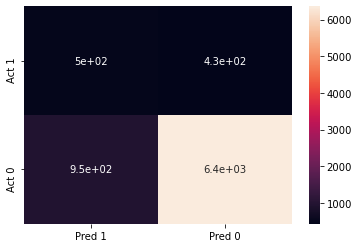

In [37]:
cm_KNNstandard_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_KNNstandard_oversample, labels=[1, 0]) 
df_cm_KNNstandard_oversample = pd.DataFrame(cm_KNNstandard_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_KNNstandard_oversample, annot=True)

In [38]:
roc_auc_score(y_test_dummy, y_pred_dummy_KNNstandard_oversample)

0.7021934996933817

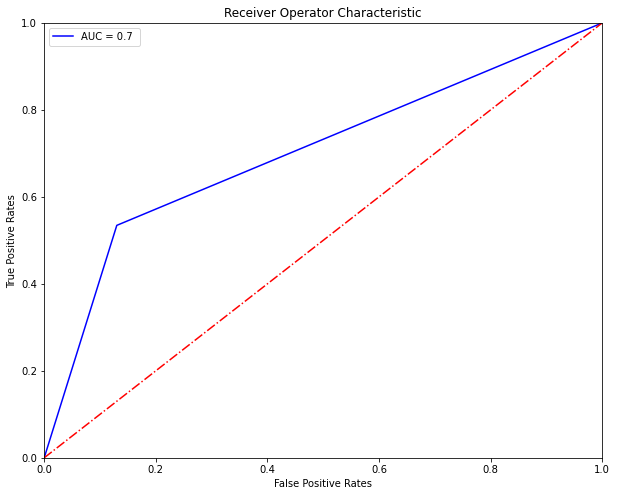

In [39]:
probs = model_dummyKNN_oversample3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [50]:
model_dummyKNN_oversample3.best_params_

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

In [51]:
model_dummyKNN_oversample3.best_score_

0.9492270333128121

## Decision Tree Classifier - Oversampling

In [40]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy2)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyDT_oversample = DecisionTreeClassifier()

params_dummyDT = {
    "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    
    "min_samples_split" : range(2,30,1),
    "min_samples_leaf" : range(1,15,1),
    "max_features" : ["auto", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

model_dummyDT_oversample = GridSearchCV(model_dummyDT_oversample, params_dummyDT, cv=3, n_jobs=-1, verbose=1)

model_dummyDT_oversample.fit(X_train_robustscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 47432 candidates, totalling 142296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 2312 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 3612 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6812 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 8712 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 10812 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 13112 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 16624 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 22024 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 27824 tasks   

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [41]:
y_pred_dummy_DTrobust_oversample = model_dummyDT_oversample.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_DTrobust_oversample))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      7310
           1       0.25      0.48      0.33       928

    accuracy                           0.77      8238
   macro avg       0.59      0.65      0.60      8238
weighted avg       0.85      0.77      0.80      8238



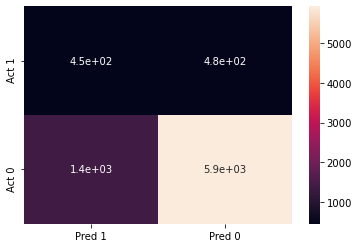

In [42]:
cm_DTrobust_oversample = confusion_matrix(y_test_dummy,y_pred_dummy_DTrobust_oversample, labels=[1, 0]) 
df_cm_DTrobust_oversample = pd.DataFrame(cm_DTrobust_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_DTrobust_oversample, annot=True)

In [43]:
roc_auc_score(y_test_dummy, y_pred_dummy_DTrobust_oversample)

0.6477920538704657

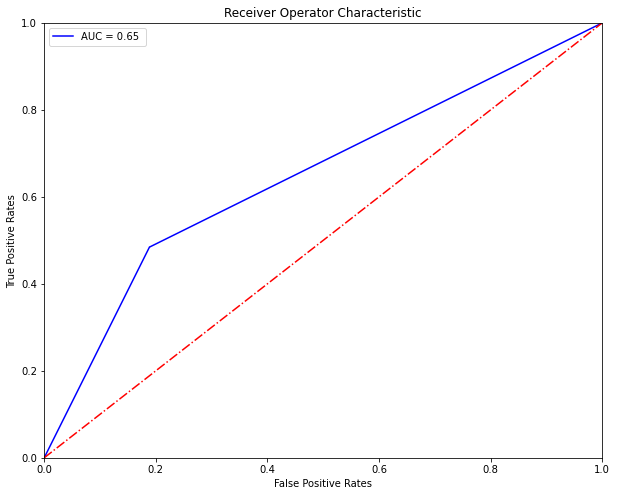

In [44]:
probs = model_dummyDT_oversample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [52]:
model_dummyDT_oversample.best_params_

{'max_depth': None,
 'max_features': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [53]:
model_dummyDT_oversample.best_score_

0.9569567001846911

In [45]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy2)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyDT_oversample2 = DecisionTreeClassifier()

params_dummyDT = {
    "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    
    "min_samples_split" : range(2,30,1),
    "min_samples_leaf" : range(1,15,1),
    "max_features" : ["auto", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

model_dummyDT_oversample2 = GridSearchCV(model_dummyDT_oversample2, params_dummyDT, cv=3, n_jobs=-1, verbose=1)

model_dummyDT_oversample2.fit(X_train_minmaxscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 47432 candidates, totalling 142296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 3620 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 5120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6820 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 8720 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 10820 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 13120 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 17816 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 23216 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 29016 tasks   

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [46]:
y_pred_dummy_DTminmax_oversample = model_dummyDT_oversample2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_DTminmax_oversample))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7310
           1       0.41      0.54      0.46       928

    accuracy                           0.86      8238
   macro avg       0.67      0.72      0.69      8238
weighted avg       0.88      0.86      0.87      8238



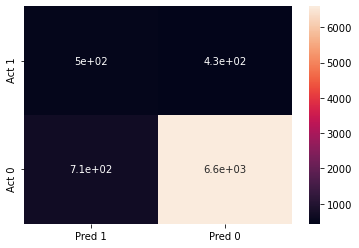

In [47]:
cm_DTminmax_oversample = confusion_matrix(y_test_dummy,y_pred_dummy_DTminmax_oversample, labels=[1, 0]) 
df_cm_DTminmax_oversample = pd.DataFrame(cm_DTminmax_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_DTminmax_oversample, annot=True)

In [48]:
roc_auc_score(y_test_dummy, y_pred_dummy_DTminmax_oversample)

0.7189429631114675

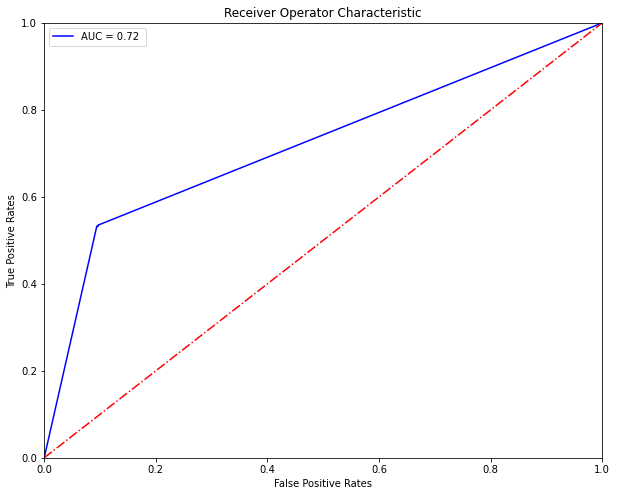

In [49]:
probs = model_dummyDT_oversample2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [54]:
model_dummyDT_oversample2.best_params_

{'max_depth': None,
 'max_features': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [55]:
model_dummyDT_oversample2.best_score_

0.9571790136124223

In [56]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy2)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyDT_oversample3 = DecisionTreeClassifier()

params_dummyDT = {
    "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    
    "min_samples_split" : range(2,30,1),
    "min_samples_leaf" : range(1,15,1),
    "max_features" : ["auto", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

model_dummyDT_oversample3 = GridSearchCV(model_dummyDT_oversample3, params_dummyDT, cv=3, n_jobs=-1, verbose=1)

model_dummyDT_oversample3.fit(X_train_standardscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 47432 candidates, totalling 142296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 3620 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 5120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6820 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 8720 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 10820 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 13120 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 17064 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 22464 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 28264 tasks   

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [57]:
y_pred_dummy_DTstandard_oversample = model_dummyDT_oversample3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_DTstandard_oversample))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      7310
           1       0.29      0.62      0.39       928

    accuracy                           0.78      8238
   macro avg       0.62      0.71      0.63      8238
weighted avg       0.87      0.78      0.81      8238



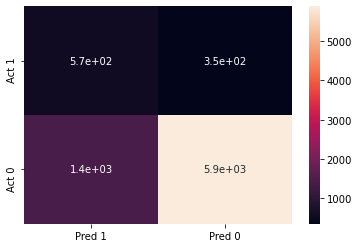

In [58]:
cm_DTstandard_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_DTstandard_oversample, labels=[1, 0]) 
df_cm_DTstandard_oversample = pd.DataFrame(cm_DTstandard_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_DTstandard_oversample, annot=True)

In [59]:
roc_auc_score(y_test_dummy, y_pred_dummy_DTstandard_oversample)

0.7116612222274635

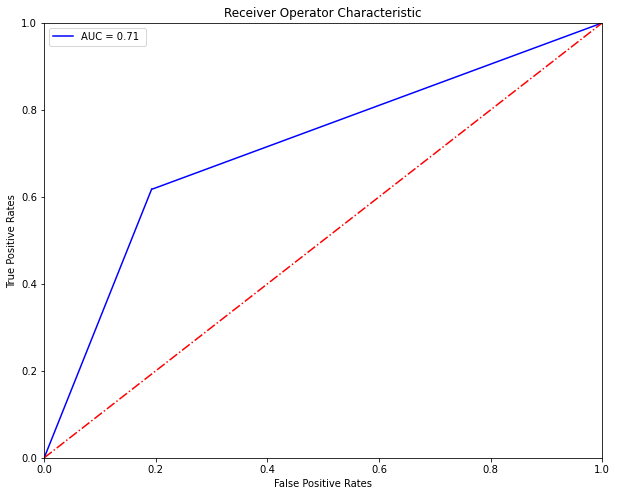

In [60]:
probs = model_dummyDT_oversample3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [61]:
model_dummyDT_oversample3.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [62]:
model_dummyDT_oversample3.best_score_

0.9572816198098365

## Random Forest Classifier - Oversampling

In [64]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy2)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyRF_oversample = RandomForestClassifier()

params_dummyRF = {
    "n_estimators" : [100, 400, 700, 1000],  
    "max_depth" : [None, 2, 4, 6, 8, 10],
    "min_samples_split" : [2,6,10],
    "min_samples_leaf" : [1,3,5],
    "max_features" : ["auto", 0.25, 0.5, 0.75, 1]
}

model_dummyRF_oversample = GridSearchCV(model_dummyRF_oversample, params_dummyRF, cv=3, n_jobs=-1, verbose=1)

model_dummyRF_oversample.fit(X_train_robustscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 92.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 125.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 171.2min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 173.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 0.25, 0.5, 0.75, 1],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             verbose=1)

In [65]:
y_pred_dummy_RFrobust_oversample = model_dummyRF_oversample.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_RFrobust_oversample))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      7310
           1       0.32      0.79      0.46       928

    accuracy                           0.79      8238
   macro avg       0.65      0.79      0.66      8238
weighted avg       0.90      0.79      0.82      8238



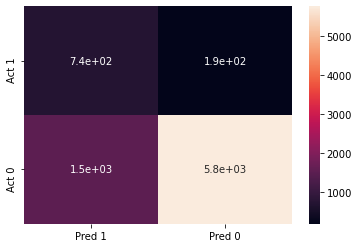

In [66]:
cm_RFrobust_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_RFrobust_oversample, labels=[1, 0]) 
df_cm_RFrobust_oversample = pd.DataFrame(cm_RFrobust_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_RFrobust_oversample, annot=True)

In [67]:
roc_auc_score(y_test_dummy, y_pred_dummy_RFrobust_oversample)

0.791284966271994

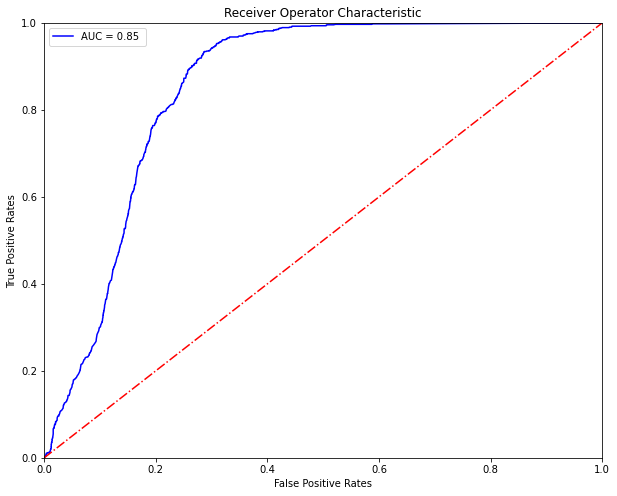

In [68]:
probs = model_dummyRF_oversample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [69]:
model_dummyRF_oversample.best_params_

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [70]:
model_dummyRF_oversample.best_score_

0.9538101101306519

In [17]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy2)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyRF_oversample2 = RandomForestClassifier()

params_dummyRF = {
    "n_estimators" : [100, 400, 700, 1000],  
    "max_depth" : [None, 2, 4, 6, 8, 10],
    "min_samples_split" : [2,6,10],
    "min_samples_leaf" : [1,3,5],
    "max_features" : ["auto", 0.25, 0.5, 0.75, 1]
}

model_dummyRF_oversample2 = GridSearchCV(model_dummyRF_oversample2, params_dummyRF, cv=3, n_jobs=-1, verbose=1)

model_dummyRF_oversample2.fit(X_train_minmaxscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 63.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 91.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 126.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 176.0min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 179.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 0.25, 0.5, 0.75, 1],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             verbose=1)

In [18]:
y_pred_dummy_RFminmax_oversample = model_dummyRF_oversample2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_RFminmax_oversample))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      7310
           1       0.45      0.71      0.55       928

    accuracy                           0.87      8238
   macro avg       0.71      0.80      0.74      8238
weighted avg       0.90      0.87      0.88      8238



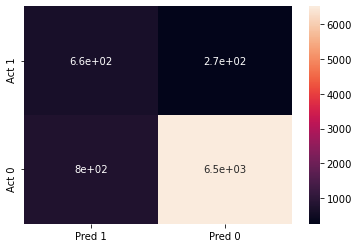

In [19]:
cm_RFminmax_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_RFminmax_oversample, labels=[1, 0]) 
df_cm_RFminmax_oversample = pd.DataFrame(cm_RFminmax_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_RFminmax_oversample, annot=True)

In [20]:
roc_auc_score(y_test_dummy, y_pred_dummy_RFminmax_oversample)

0.8006102882211426

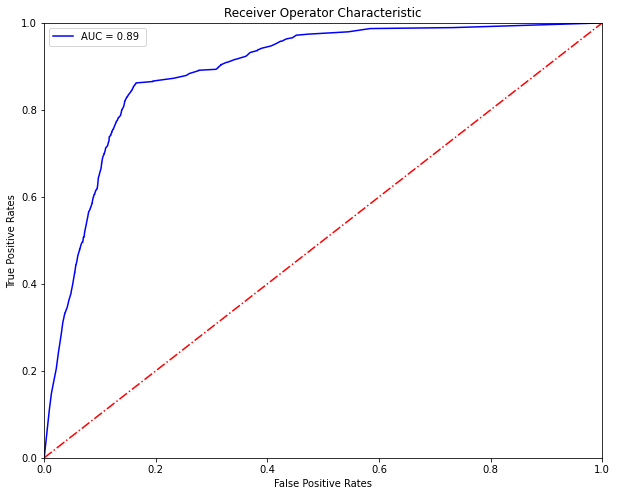

In [21]:
probs = model_dummyRF_oversample2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [22]:
model_dummyRF_oversample2.best_params_

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [23]:
model_dummyRF_oversample2.best_score_

0.9536219987687256

In [25]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy2)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyRF_oversample3 = RandomForestClassifier()

params_dummyRF = {
    "n_estimators" : [100, 400, 700, 1000],  
    "max_depth" : [None, 2, 4, 6, 8, 10],
    "min_samples_split" : [2,6,10],
    "min_samples_leaf" : [1,3,5],
    "max_features" : ["auto", 0.25, 0.5, 0.75, 1]
}

model_dummyRF_oversample3 = GridSearchCV(model_dummyRF_oversample3, params_dummyRF, cv=3, n_jobs=-1, verbose=1)

model_dummyRF_oversample3.fit(X_train_standardscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 86.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 122.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 170.3min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 173.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 0.25, 0.5, 0.75, 1],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             verbose=1)

In [26]:
y_pred_dummy_RFstandard_oversample = model_dummyRF_oversample3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_RFstandard_oversample))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      7310
           1       0.36      0.72      0.48       928

    accuracy                           0.83      8238
   macro avg       0.66      0.78      0.69      8238
weighted avg       0.89      0.83      0.85      8238



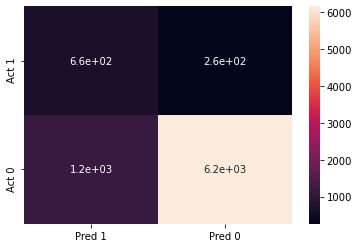

In [27]:
cm_RFstandard_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_RFstandard_oversample, labels=[1, 0]) 
df_cm_RFstandard_oversample = pd.DataFrame(cm_RFstandard_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_RFstandard_oversample, annot=True)

In [28]:
roc_auc_score(y_test_dummy, y_pred_dummy_RFstandard_oversample)

0.7790908474456342

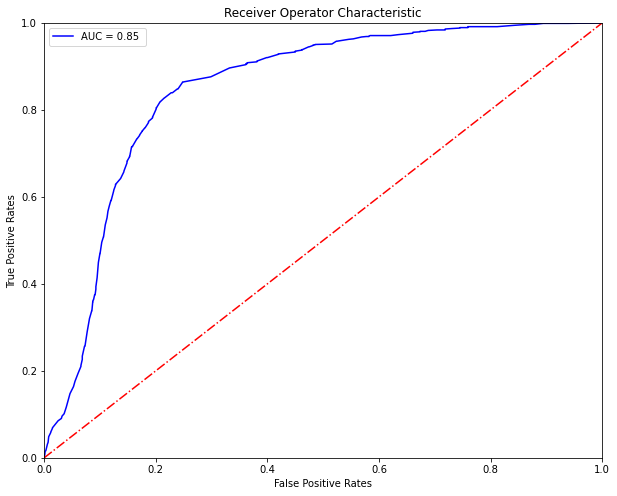

In [29]:
probs = model_dummyRF_oversample3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [30]:
model_dummyRF_oversample3.best_params_

{'max_depth': None,
 'max_features': 0.25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [31]:
model_dummyRF_oversample3.best_score_

0.953810110130652

## Support Vector Machine Classifier - Oversampling

In [17]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy2)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummySVC_oversample = SVC()

params_dummySVC = {
    "C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "gamma" : np.logspace(-4, 4, 7),    
    "class_weight" : [None, "balanced"]
}

model_dummySVC_oversample = GridSearchCV(model_dummySVC_oversample, params_dummySVC, cv=3, n_jobs=-1, verbose=1)

model_dummySVC_oversample.fit(X_train_robustscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 72.6min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 174.6min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00,
       2.15443469e+01, 4.64158883e+02, 1.00000000e+04])},
             verbose=1)

In [18]:
y_pred_dummy_SVCrobust_oversample = model_dummySVC_oversample.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_SVCrobust_oversample))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


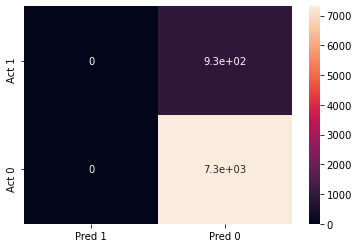

In [19]:
cm_SVCrobust_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_SVCrobust_oversample, labels=[1, 0]) 
df_cm_SVCrobust_oversample = pd.DataFrame(cm_SVCrobust_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_SVCrobust_oversample, annot=True)

In [20]:
roc_auc_score(y_test_dummy, y_pred_dummy_SVCrobust_oversample)

0.5

In [ ]:
probs = model_dummySVC_oversample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [21]:
model_dummySVC_oversample.best_params_

{'C': 1, 'class_weight': None, 'gamma': 10000.0}

In [22]:
model_dummySVC_oversample.best_score_

0.9190950133388057

In [18]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy2)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummySVC_auc_oversample = SVC(probability = True, C = 1, class_weight = None, gamma = 10000)

model_dummySVC_auc_oversample.fit(X_train_robustscaled_balance, y_train_dummy2)

SVC(C=1, gamma=10000, probability=True)

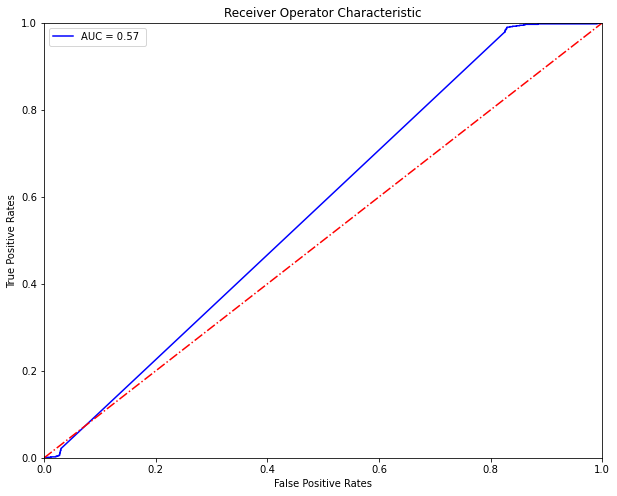

In [19]:
probs = model_dummySVC_auc_oversample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [23]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy2)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummySVC_oversample2 = SVC()

params_dummySVC = {
    "C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "gamma" : np.logspace(-4, 4, 7),    
    "class_weight" : [None, "balanced"]
}

model_dummySVC_oversample2 = GridSearchCV(model_dummySVC_oversample2, params_dummySVC, cv=3, n_jobs=-1, verbose=1)

model_dummySVC_oversample2.fit(X_train_minmaxscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 129.8min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00,
       2.15443469e+01, 4.64158883e+02, 1.00000000e+04])},
             verbose=1)

In [24]:
y_pred_dummy_SVCminmax_oversample = model_dummySVC_oversample2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_SVCminmax_oversample))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      7310
           1       0.27      0.97      0.43       928

    accuracy                           0.71      8238
   macro avg       0.63      0.82      0.62      8238
weighted avg       0.91      0.71      0.76      8238



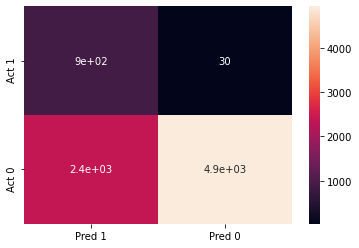

In [25]:
cm_SVCminmax_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_SVCminmax_oversample, labels=[1, 0]) 
df_cm_SVCminmax_oversample = pd.DataFrame(cm_SVCminmax_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_SVCminmax_oversample, annot=True)

In [26]:
roc_auc_score(y_test_dummy, y_pred_dummy_SVCminmax_oversample)

0.8213191070333508

In [27]:
model_dummySVC_oversample2.best_params_

{'C': 1, 'class_weight': None, 'gamma': 10000.0}

In [28]:
model_dummySVC_oversample2.best_score_

0.8943669197619536

In [20]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy2)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummySVC_auc_oversample2 = SVC(probability = True, C = 1, class_weight = None, gamma = 10000.0)

model_dummySVC_auc_oversample2.fit(X_train_minmaxscaled_balance, y_train_dummy2)

SVC(C=1, gamma=10000.0, probability=True)

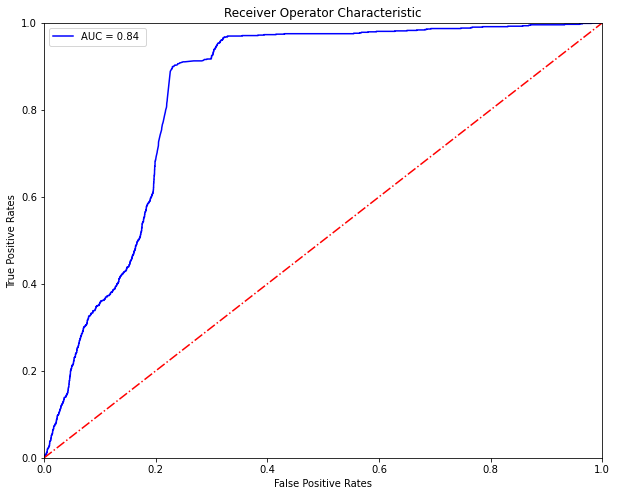

In [21]:
probs = model_dummySVC_auc_oversample2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [30]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy2)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummySVC_oversample3 = SVC()

params_dummySVC = {
    "C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "gamma" : np.logspace(-4, 4, 7),    
    "class_weight" : [None, "balanced"]
}

model_dummySVC_oversample3 = GridSearchCV(model_dummySVC_oversample3, params_dummySVC, cv=3, n_jobs=-1, verbose=1)

model_dummySVC_oversample3.fit(X_train_standardscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 62.6min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 170.7min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00,
       2.15443469e+01, 4.64158883e+02, 1.00000000e+04])},
             verbose=1)

In [31]:
y_pred_dummy_SVCstandard_oversample = model_dummySVC_oversample3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_SVCstandard_oversample))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


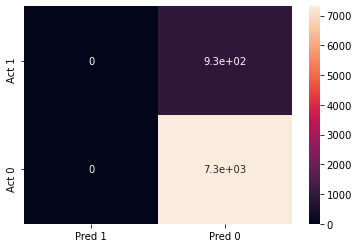

In [32]:
cm_SVCstandard_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_SVCstandard_oversample, labels=[1, 0]) 
df_cm_SVCstandard_oversample = pd.DataFrame(cm_SVCstandard_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_SVCstandard_oversample, annot=True)

In [33]:
roc_auc_score(y_test_dummy, y_pred_dummy_SVCstandard_oversample)

0.5

In [34]:
model_dummySVC_oversample3.best_params_

{'C': 1, 'class_weight': None, 'gamma': 10000.0}

In [35]:
model_dummySVC_oversample3.best_score_

0.9393084342294274

In [23]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy2)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummySVC_auc_oversample3 = SVC(probability = True, C = 1, class_weight = None, gamma = 10000.0)

model_dummySVC_auc_oversample3.fit(X_train_standardscaled_balance, y_train_dummy2)

SVC(C=1, gamma=10000.0, probability=True)

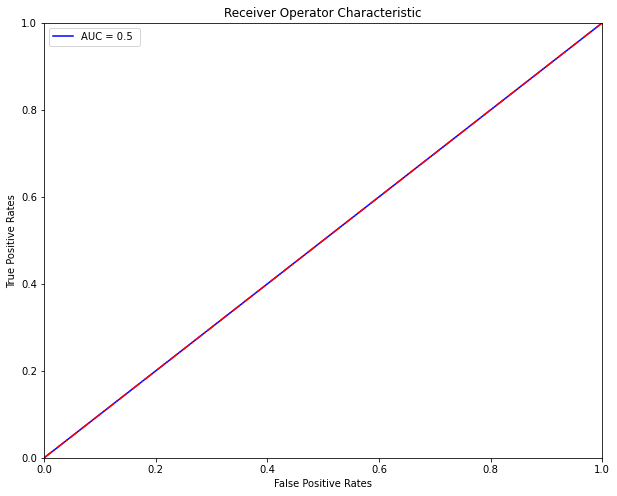

In [24]:
probs = model_dummySVC_auc_oversample3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

## Extreme Gradient Boosting (XGBoost) Classifier - Oversampling

In [18]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy2)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyXGB_oversample = XGBClassifier()

params_dummyXGB = {
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 1],    
    "n_estimators" : [100, 300, 500, 700, 1000],
    "gamma" : [0, 0.3, 0.5, 0.7, 1],
}

model_dummyXGB_oversample = GridSearchCV(model_dummyXGB_oversample, params_dummyXGB, cv=3, n_jobs=-1, verbose=1)

model_dummyXGB_oversample.fit(X_train_robustscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 49.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 71.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 85.4min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [21]:
y_pred_dummy_XGBrobust_oversample = model_dummyXGB_oversample.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_XGBrobust_oversample))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      7310
           1       0.29      0.82      0.43       928

    accuracy                           0.75      8238
   macro avg       0.63      0.78      0.64      8238
weighted avg       0.89      0.75      0.80      8238



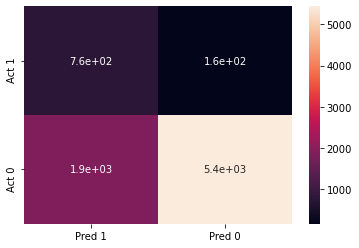

In [22]:
cm_XGBrobust_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_XGBrobust_oversample, labels=[1, 0]) 
df_cm_XGBrobust_oversample = pd.DataFrame(cm_XGBrobust_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_XGBrobust_oversample, annot=True)

In [23]:
roc_auc_score(y_test_dummy, y_pred_dummy_XGBrobust_oversample)

0.783594155384688

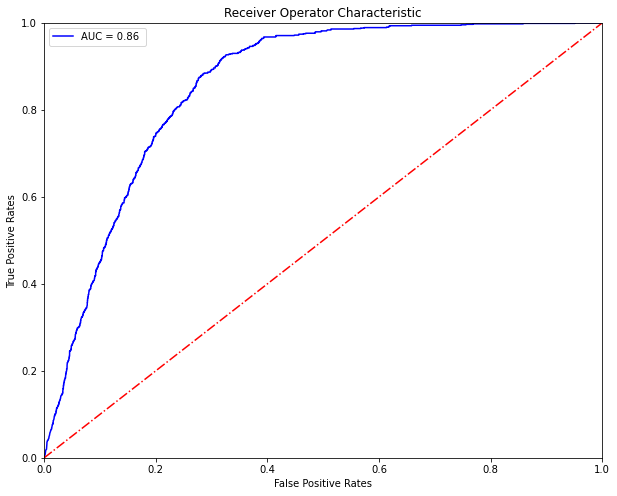

In [24]:
probs = model_dummyXGB_oversample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [25]:
model_dummyXGB_oversample.best_params_

{'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'n_estimators': 1000}

In [26]:
model_dummyXGB_oversample.best_score_

0.9559477392434502

In [19]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy2)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyXGB_oversample2 = XGBClassifier()

params_dummyXGB = {
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 1],    
    "n_estimators" : [100, 300, 500, 700, 1000],
    "gamma" : [0, 0.3, 0.5, 0.7, 1],
}

model_dummyXGB_oversample2 = GridSearchCV(model_dummyXGB_oversample2, params_dummyXGB, cv=3, n_jobs=-1, verbose=1)

model_dummyXGB_oversample2.fit(X_train_minmaxscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 63.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 79.2min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [27]:
y_pred_dummy_XGBminmax_oversample = model_dummyXGB_oversample2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_XGBminmax_oversample))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7310
           1       0.43      0.70      0.54       928

    accuracy                           0.86      8238
   macro avg       0.70      0.79      0.73      8238
weighted avg       0.90      0.86      0.88      8238



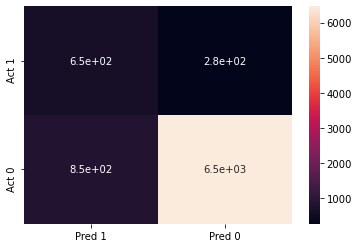

In [28]:
cm_XGBminmax_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_XGBminmax_oversample, labels=[1, 0]) 
df_cm_XGBminmax_oversample = pd.DataFrame(cm_XGBminmax_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_XGBminmax_oversample, annot=True)

In [29]:
roc_auc_score(y_test_dummy, y_pred_dummy_XGBminmax_oversample)

0.7920759823576584

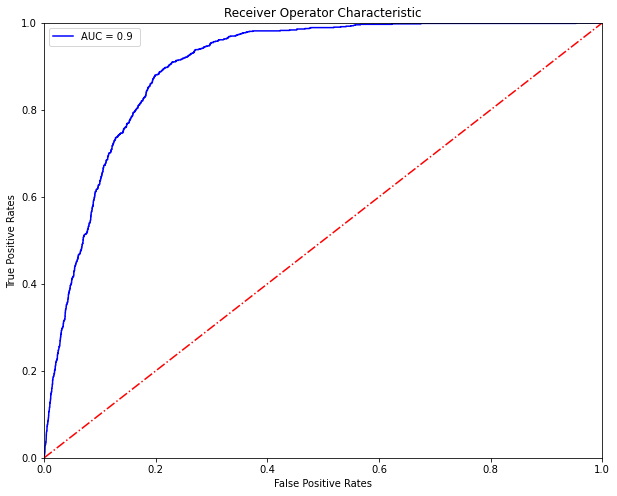

In [30]:
probs = model_dummyXGB_oversample2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [31]:
model_dummyXGB_oversample2.best_params_

{'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'n_estimators': 700}

In [32]:
model_dummyXGB_oversample2.best_score_

0.9559306382105479

In [20]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy2)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyXGB_oversample3 = XGBClassifier()

params_dummyXGB = {
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 1],    
    "n_estimators" : [100, 300, 500, 700, 1000],
    "gamma" : [0, 0.3, 0.5, 0.7, 1],
}

model_dummyXGB_oversample3 = GridSearchCV(model_dummyXGB_oversample3, params_dummyXGB, cv=3, n_jobs=-1, verbose=1)

model_dummyXGB_oversample3.fit(X_train_standardscaled_balance, y_train_dummy2)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 65.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 78.5min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [33]:
y_pred_dummy_XGBstandard_oversample = model_dummyXGB_oversample3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_XGBstandard_oversample))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      7310
           1       0.31      0.73      0.43       928

    accuracy                           0.79      8238
   macro avg       0.63      0.76      0.65      8238
weighted avg       0.88      0.79      0.82      8238



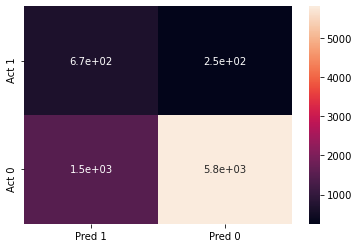

In [34]:
cm_XGBstandard_oversample = confusion_matrix(y_test_dummy, y_pred_dummy_XGBstandard_oversample, labels=[1, 0]) 
df_cm_XGBstandard_oversample = pd.DataFrame(cm_XGBstandard_oversample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_XGBstandard_oversample, annot=True)

In [35]:
roc_auc_score(y_test_dummy, y_pred_dummy_XGBstandard_oversample)

0.7600685763479409

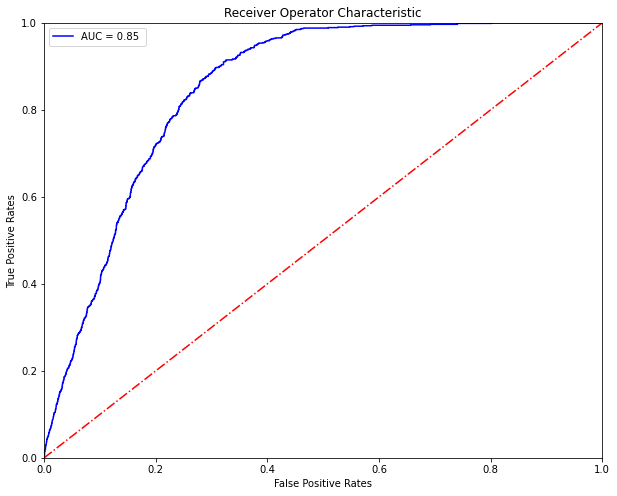

In [36]:
probs = model_dummyXGB_oversample3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [37]:
model_dummyXGB_oversample3.best_params_

{'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'n_estimators': 1000}

In [38]:
model_dummyXGB_oversample3.best_score_

0.9559135371776456

## 2. Undersampling

In [39]:
X.y.value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [25]:
marketting_undersample = resample(marketting_no, 
                            replace=False,
                            n_samples = len(marketting_yes),
                            random_state = 42
)

In [26]:
undersampled = pd.concat([marketting_undersample, marketting_yes])

In [27]:
undersampled.y.value_counts()

1    3712
0    3712
Name: y, dtype: int64

In [28]:
X_train_dummy3 = undersampled.drop(columns="y")
y_train_dummy3 = undersampled.y

## K Neighbors Classifier - Undersampling

In [44]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy3)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyKNN_undersample = KNeighborsClassifier()

params_dummyKNN = {
    "n_neighbors" : range(1,50,2),
    "weights" : ["uniform", "distance"],
    "p" : [2, 1]
}

model_dummyKNN_undersample = GridSearchCV(model_dummyKNN_undersample, params_dummyKNN, cv=3, n_jobs=-1, verbose=1)

model_dummyKNN_undersample.fit(X_train_robustscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.7s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50, 2), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [45]:
y_pred_dummy_KNNrobust_undersample = model_dummyKNN_undersample.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_KNNrobust_undersample))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76      7310
           1       0.24      0.99      0.39       928

    accuracy                           0.65      8238
   macro avg       0.62      0.80      0.57      8238
weighted avg       0.91      0.65      0.71      8238



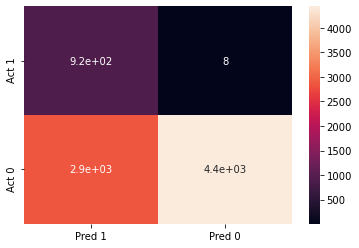

In [46]:
cm_KNNrobust_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_KNNrobust_undersample, labels=[1, 0]) 
df_cm_KNNrobust_undersample = pd.DataFrame(cm_KNNrobust_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_KNNrobust_undersample, annot=True)

In [47]:
roc_auc_score(y_test_dummy, y_pred_dummy_KNNrobust_undersample)

0.7992464267182414

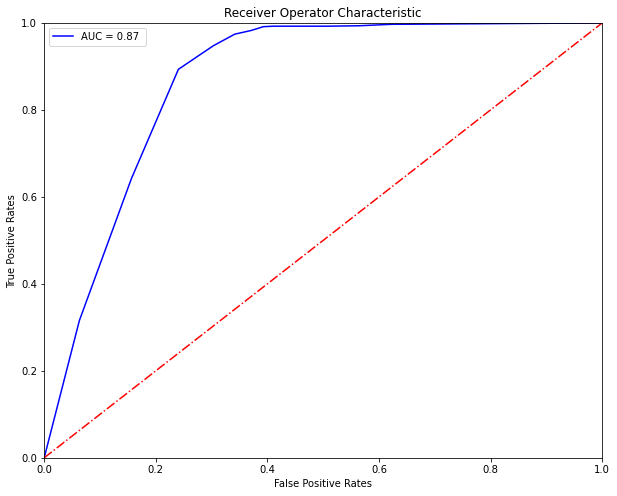

In [48]:
probs = model_dummyKNN_undersample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [49]:
model_dummyKNN_undersample.best_params_

{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}

In [50]:
model_dummyKNN_undersample.best_score_

0.8731153627354112

In [51]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy3)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyKNN_undersample2 = KNeighborsClassifier()

params_dummyKNN = {
    "n_neighbors" : range(1,50,2),
    "weights" : ["uniform", "distance"],
    "p" : [2, 1]
}

model_dummyKNN_undersample2 = GridSearchCV(model_dummyKNN_undersample2, params_dummyKNN, cv=3, n_jobs=-1, verbose=1)

model_dummyKNN_undersample2.fit(X_train_minmaxscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.5s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50, 2), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [52]:
y_pred_dummy_KNNminmax_undersample = model_dummyKNN_undersample2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_KNNminmax_undersample))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      7310
           1       0.37      0.97      0.54       928

    accuracy                           0.81      8238
   macro avg       0.68      0.88      0.71      8238
weighted avg       0.93      0.81      0.84      8238



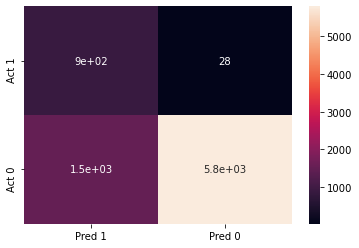

In [53]:
cm_KNNminmax_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_KNNminmax_undersample, labels=[1, 0]) 
df_cm_KNNminmax_undersample = pd.DataFrame(cm_KNNminmax_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_KNNminmax_undersample, annot=True)

In [54]:
roc_auc_score(y_test_dummy, y_pred_dummy_KNNminmax_undersample)

0.8810834237464031

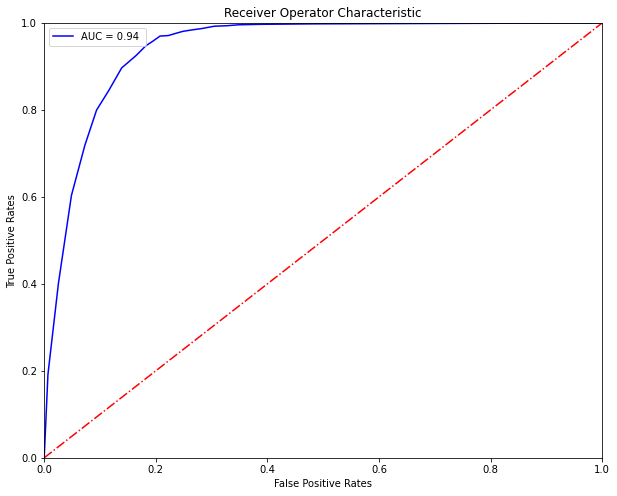

In [55]:
probs = model_dummyKNN_undersample2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [56]:
model_dummyKNN_undersample2.best_params_

{'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}

In [57]:
model_dummyKNN_undersample2.best_score_

0.8754051427778187

In [58]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy3)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyKNN_undersample3 = KNeighborsClassifier()

params_dummyKNN = {
    "n_neighbors" : range(1,50,2),
    "weights" : ["uniform", "distance"],
    "p" : [2, 1]
}

model_dummyKNN_undersample3 = GridSearchCV(model_dummyKNN_undersample3, params_dummyKNN, cv=3, n_jobs=-1, verbose=1)

model_dummyKNN_undersample3.fit(X_train_standardscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.7s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50, 2), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [59]:
y_pred_dummy_KNNstandard_undersample = model_dummyKNN_undersample3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_KNNstandard_undersample))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80      7310
           1       0.27      0.98      0.42       928

    accuracy                           0.70      8238
   macro avg       0.63      0.82      0.61      8238
weighted avg       0.91      0.70      0.75      8238



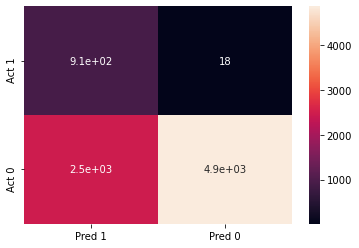

In [60]:
cm_KNNstandard_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_KNNstandard_undersample, labels=[1, 0]) 
df_cm_KNNstandard_undersample = pd.DataFrame(cm_KNNstandard_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_KNNstandard_undersample, annot=True)

In [61]:
roc_auc_score(y_test_dummy, y_pred_dummy_KNNstandard_undersample)

0.8222442685975755

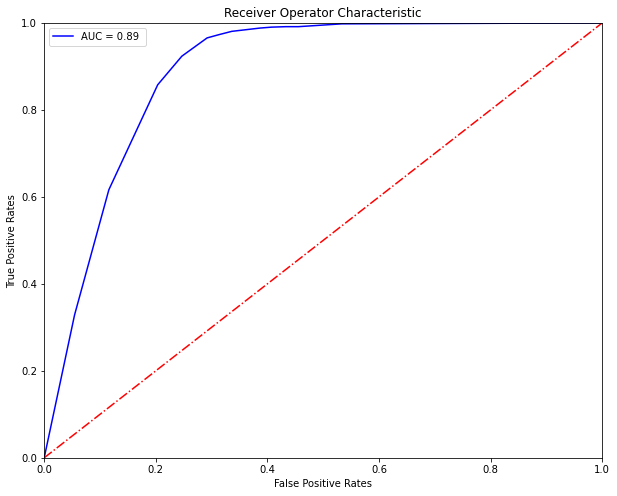

In [62]:
probs = model_dummyKNN_undersample3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [63]:
model_dummyKNN_undersample3.best_params_

{'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}

In [64]:
model_dummyKNN_undersample3.best_score_

0.876213332462322

## Decision Tree Classifier - Undersampling

In [65]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy3)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyDT_undersample = DecisionTreeClassifier()

params_dummyDT = {
    "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    
    "min_samples_split" : range(2,30,1),
    "min_samples_leaf" : range(1,15,1),
    "max_features" : ["auto", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

model_dummyDT_undersample = GridSearchCV(model_dummyDT_undersample, params_dummyDT, cv=3, n_jobs=-1, verbose=1)

model_dummyDT_undersample.fit(X_train_robustscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 47432 candidates, totalling 142296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 10832 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 22032 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 36432 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 54032 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 74832 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 98832 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 126032 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 142296 out of 142296 | elapsed:  3.0min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [66]:
y_pred_dummy_DTrobust_undersample = model_dummyDT_undersample.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_DTrobust_undersample))

              precision    recall  f1-score   support

           0       1.00      0.51      0.68      7310
           1       0.21      0.99      0.34       928

    accuracy                           0.57      8238
   macro avg       0.60      0.75      0.51      8238
weighted avg       0.91      0.57      0.64      8238



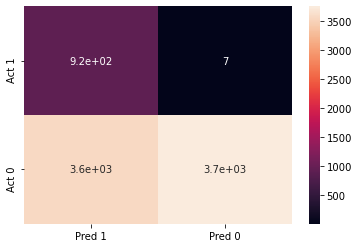

In [67]:
cm_DTrobust_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_DTrobust_undersample, labels=[1, 0]) 
df_cm_DTrobust_undersample = pd.DataFrame(cm_DTrobust_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_DTrobust_undersample, annot=True)

In [68]:
roc_auc_score(y_test_dummy, y_pred_dummy_DTrobust_undersample)

0.7524527984810605

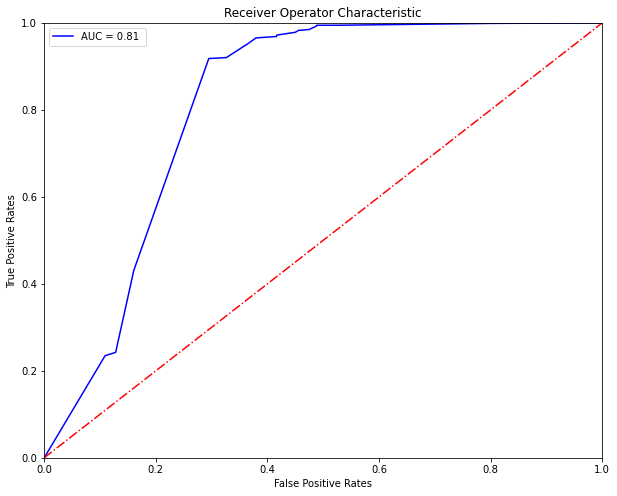

In [69]:
probs = model_dummyDT_undersample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [70]:
model_dummyDT_undersample.best_params_

{'max_depth': 7,
 'max_features': 0.6,
 'min_samples_leaf': 10,
 'min_samples_split': 24}

In [72]:
model_dummyDT_undersample.best_score_

0.8803880355699273

In [73]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy3)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyDT_undersample2 = DecisionTreeClassifier()

params_dummyDT = {
    "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    
    "min_samples_split" : range(2,30,1),
    "min_samples_leaf" : range(1,15,1),
    "max_features" : ["auto", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

model_dummyDT_undersample2 = GridSearchCV(model_dummyDT_undersample2, params_dummyDT, cv=3, n_jobs=-1, verbose=1)

model_dummyDT_undersample2.fit(X_train_minmaxscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 47432 candidates, totalling 142296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1800 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 11400 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 22088 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 39688 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 60488 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 84488 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 111688 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 141938 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 142296 out of 142296 | elapsed:  3.2min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [74]:
y_pred_dummy_DTminmax_undersample = model_dummyDT_undersample.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_DTminmax_undersample))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7310
           1       0.39      0.12      0.19       928

    accuracy                           0.88      8238
   macro avg       0.64      0.55      0.56      8238
weighted avg       0.84      0.88      0.85      8238



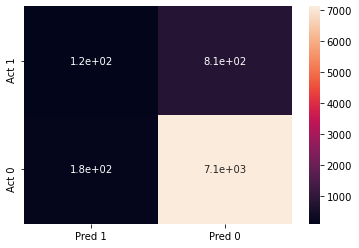

In [75]:
cm_DTminmax_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_DTminmax_undersample, labels=[1, 0]) 
df_cm_DTminmax_undersample = pd.DataFrame(cm_DTminmax_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_DTminmax_undersample, annot=True)

In [76]:
roc_auc_score(y_test_dummy, y_pred_dummy_DTminmax_undersample)

0.5499145006839945

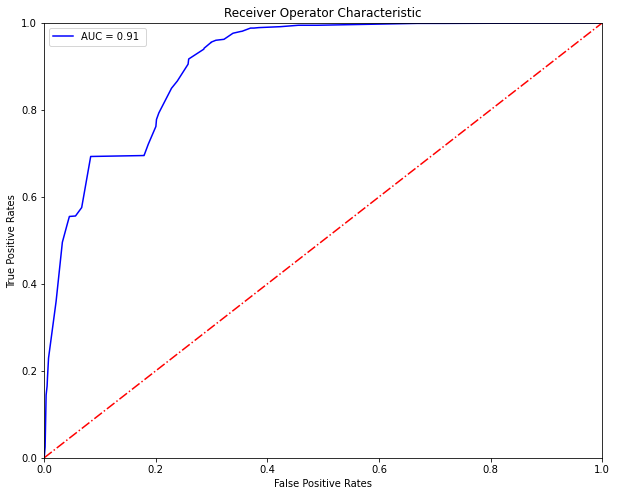

In [77]:
probs = model_dummyDT_undersample2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [78]:
model_dummyDT_undersample2.best_params_

{'max_depth': 6,
 'max_features': 0.7,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [79]:
model_dummyDT_undersample2.best_score_

0.880927627120028

In [80]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy3)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyDT_undersample3 = DecisionTreeClassifier()

params_dummyDT = {
    "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    
    "min_samples_split" : range(2,30,1),
    "min_samples_leaf" : range(1,15,1),
    "max_features" : ["auto", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

model_dummyDT_undersample3 = GridSearchCV(model_dummyDT_undersample3, params_dummyDT, cv=3, n_jobs=-1, verbose=1)

model_dummyDT_undersample3.fit(X_train_standardscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 47432 candidates, totalling 142296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 22448 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 40048 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 60848 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 84848 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 112048 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 142076 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 142296 out of 142296 | elapsed:  3.1min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [81]:
y_pred_dummy_DTstandard_undersample = model_dummyDT_undersample3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_DTstandard_undersample))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      7310
           1       0.25      0.98      0.40       928

    accuracy                           0.67      8238
   macro avg       0.62      0.81      0.59      8238
weighted avg       0.91      0.67      0.73      8238



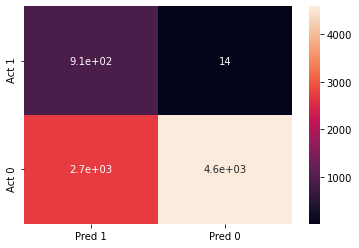

In [82]:
cm_DTstandard_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_DTstandard_undersample, labels=[1, 0]) 
df_cm_DTstandard_undersample = pd.DataFrame(cm_DTstandard_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_DTstandard_undersample, annot=True)

In [83]:
roc_auc_score(y_test_dummy, y_pred_dummy_DTstandard_undersample)

0.8059999882069909

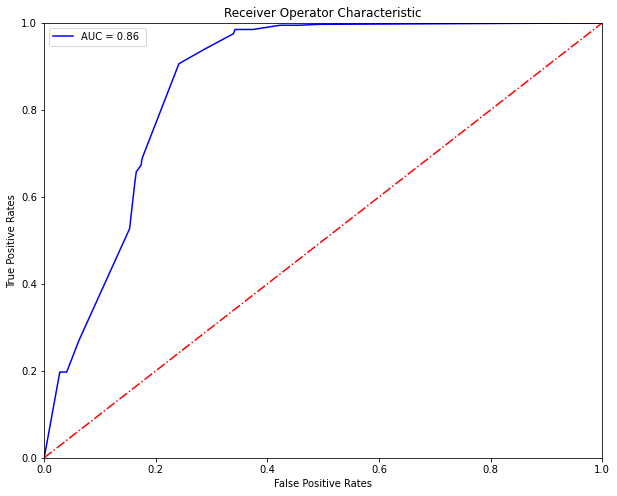

In [84]:
probs = model_dummyDT_undersample3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [85]:
model_dummyDT_undersample3.best_params_

{'max_depth': 7,
 'max_features': 0.5,
 'min_samples_leaf': 14,
 'min_samples_split': 13}

In [86]:
model_dummyDT_undersample3.best_score_

0.8805235322777764

## Random Forest Classifier - Undersampling

In [87]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy3)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyRF_undersample = RandomForestClassifier()

params_dummyRF = {
    "n_estimators" : [100, 400, 700, 1000],  
    "max_depth" : [None, 2, 4, 6, 8, 10],
    "min_samples_split" : [2,6,10],
    "min_samples_leaf" : [1,3,5],
    "max_features" : ["auto", 0.25, 0.5, 0.75, 1]
}

model_dummyRF_undersample = GridSearchCV(model_dummyRF_undersample, params_dummyRF, cv=3, n_jobs=-1, verbose=1)

model_dummyRF_undersample.fit(X_train_robustscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 27.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 0.25, 0.5, 0.75, 1],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             verbose=1)

In [88]:
y_pred_dummy_RFrobust_undersample = model_dummyRF_undersample.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_RFrobust_undersample))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73      7310
           1       0.23      0.99      0.37       928

    accuracy                           0.62      8238
   macro avg       0.61      0.78      0.55      8238
weighted avg       0.91      0.62      0.69      8238



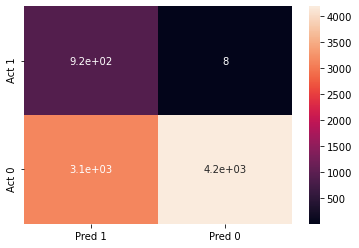

In [89]:
cm_RFrobust_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_RFrobust_undersample, labels=[1, 0]) 
df_cm_RFrobust_undersample = pd.DataFrame(cm_RFrobust_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_RFrobust_undersample, annot=True)

In [90]:
roc_auc_score(y_test_dummy, y_pred_dummy_RFrobust_undersample)

0.7815993678947121

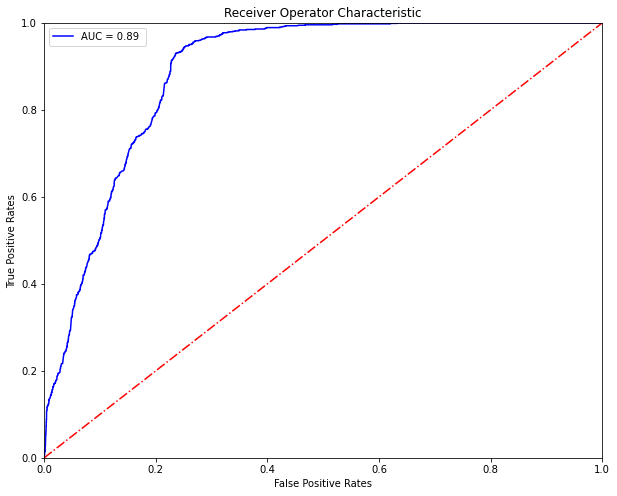

In [91]:
probs = model_dummyRF_undersample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [92]:
model_dummyRF_undersample.best_params_

{'max_depth': 10,
 'max_features': 0.75,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [93]:
model_dummyRF_undersample.best_score_

0.8836217197575321

In [94]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy3)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyRF_undersample2 = RandomForestClassifier()

params_dummyRF = {
    "n_estimators" : [100, 400, 700, 1000],  
    "max_depth" : [None, 2, 4, 6, 8, 10],
    "min_samples_split" : [2,6,10],
    "min_samples_leaf" : [1,3,5],
    "max_features" : ["auto", 0.25, 0.5, 0.75, 1]
}

model_dummyRF_undersample2 = GridSearchCV(model_dummyRF_undersample2, params_dummyRF, cv=3, n_jobs=-1, verbose=1)

model_dummyRF_undersample2.fit(X_train_minmaxscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 28.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 0.25, 0.5, 0.75, 1],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             verbose=1)

In [95]:
y_pred_dummy_RFminmax_undersample = model_dummyRF_undersample2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_RFminmax_undersample))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87      7310
           1       0.36      0.97      0.52       928

    accuracy                           0.80      8238
   macro avg       0.68      0.88      0.70      8238
weighted avg       0.92      0.80      0.84      8238



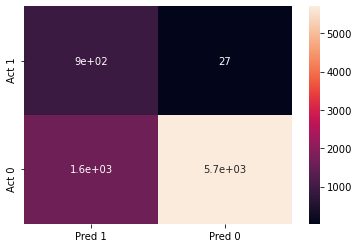

In [96]:
cm_RFminmax_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_RFminmax_undersample, labels=[1, 0]) 
df_cm_RFminmax_undersample = pd.DataFrame(cm_RFminmax_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_RFminmax_undersample, annot=True)

In [97]:
roc_auc_score(y_test_dummy, y_pred_dummy_RFminmax_undersample)

0.8756714644558705

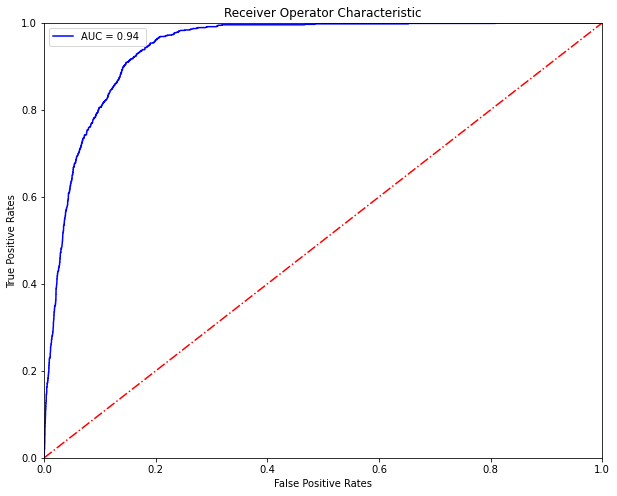

In [98]:
probs = model_dummyRF_undersample2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [99]:
model_dummyRF_undersample2.best_params_

{'max_depth': 10,
 'max_features': 0.75,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 100}

In [100]:
model_dummyRF_undersample2.best_score_

0.8832175704770693

In [101]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy3)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyRF_undersample3 = RandomForestClassifier()

params_dummyRF = {
    "n_estimators" : [100, 400, 700, 1000],  
    "max_depth" : [None, 2, 4, 6, 8, 10],
    "min_samples_split" : [2,6,10],
    "min_samples_leaf" : [1,3,5],
    "max_features" : ["auto", 0.25, 0.5, 0.75, 1]
}

model_dummyRF_undersample3 = GridSearchCV(model_dummyRF_undersample3, params_dummyRF, cv=3, n_jobs=-1, verbose=1)

model_dummyRF_undersample3.fit(X_train_standardscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 27.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 0.25, 0.5, 0.75, 1],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             verbose=1)

In [102]:
y_pred_dummy_RFstandard_undersample = model_dummyRF_undersample3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_RFstandard_undersample))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75      7310
           1       0.24      0.99      0.39       928

    accuracy                           0.65      8238
   macro avg       0.62      0.80      0.57      8238
weighted avg       0.91      0.65      0.71      8238



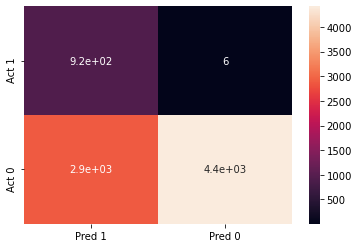

In [103]:
cm_RFstandard_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_RFstandard_undersample, labels=[1, 0]) 
df_cm_RFstandard_undersample = pd.DataFrame(cm_RFstandard_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_RFstandard_undersample, annot=True)

In [104]:
roc_auc_score(y_test_dummy, y_pred_dummy_RFstandard_undersample)

0.7989560238690503

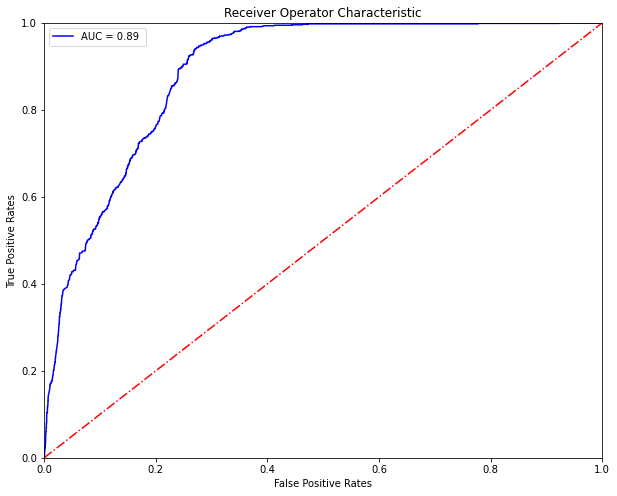

In [105]:
probs = model_dummyRF_undersample3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [106]:
model_dummyRF_undersample3.best_params_

{'max_depth': 8,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [107]:
model_dummyRF_undersample3.best_score_

0.8828133667583952

## Support Vector Machine (SVM) Classifier - Undersampling

In [108]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy3)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummySVC_undersample = SVC()

params_dummySVC = {
    "C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "gamma" : np.logspace(-4, 4, 7),    
    "class_weight" : [None, "balanced"]
}

model_dummySVC_undersample = GridSearchCV(model_dummySVC_undersample, params_dummySVC, cv=3, n_jobs=-1, verbose=1)

model_dummySVC_undersample.fit(X_train_robustscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  2.4min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00,
       2.15443469e+01, 4.64158883e+02, 1.00000000e+04])},
             verbose=1)

In [109]:
y_pred_dummy_SVCrobust_undersample = model_dummySVC_undersample.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_SVCrobust_undersample))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29      7310
           1       0.13      1.00      0.23       928

    accuracy                           0.26      8238
   macro avg       0.57      0.58      0.26      8238
weighted avg       0.90      0.26      0.28      8238



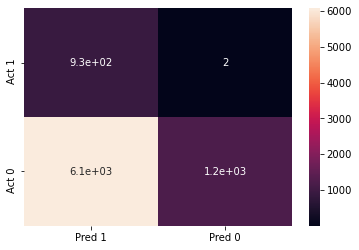

In [110]:
cm_SVCrobust_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_SVCrobust_undersample, labels=[1, 0]) 
df_cm_SVCrobust_undersample = pd.DataFrame(cm_SVCrobust_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_SVCrobust_undersample, annot=True)

In [111]:
roc_auc_score(y_test_dummy, y_pred_dummy_SVCrobust_undersample)

0.5833957380065098

In [113]:
model_dummySVC_undersample.best_params_

{'C': 0.8, 'class_weight': None, 'gamma': 21.54434690031882}

In [115]:
model_dummySVC_undersample.best_score_

0.8708250383108912

In [29]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy3)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummySVC_auc_undersample = SVC(probability = True, C = 0.8, class_weight = None, gamma = 21.54434690031882)

model_dummySVC_auc_undersample.fit(X_train_robustscaled_balance, y_train_dummy3)

SVC(C=0.8, gamma=21.54434690031882, probability=True)

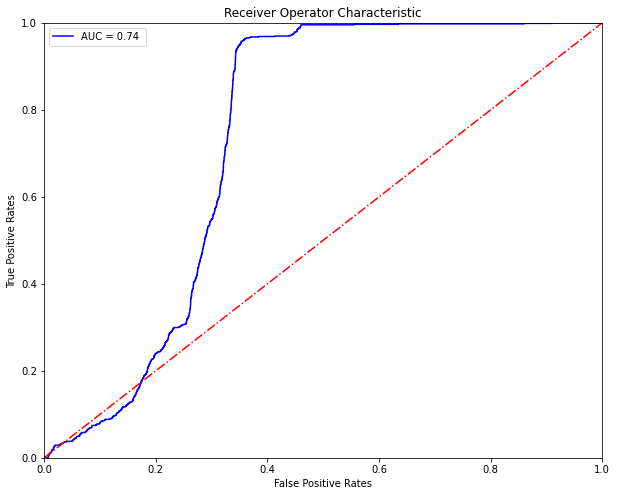

In [30]:
probs = model_dummySVC_auc_undersample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [116]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy3)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummySVC_undersample2 = SVC()

params_dummySVC = {
    "C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "gamma" : np.logspace(-4, 4, 7),    
    "class_weight" : [None, "balanced"]
}

model_dummySVC_undersample2 = GridSearchCV(model_dummySVC_undersample2, params_dummySVC, cv=3, n_jobs=-1, verbose=1)

model_dummySVC_undersample2.fit(X_train_minmaxscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  1.8min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00,
       2.15443469e+01, 4.64158883e+02, 1.00000000e+04])},
             verbose=1)

In [117]:
y_pred_dummy_SVCminmax_undersample = model_dummySVC_undersample2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_SVCminmax_undersample))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      7310
           1       0.31      0.98      0.47       928

    accuracy                           0.75      8238
   macro avg       0.65      0.85      0.65      8238
weighted avg       0.92      0.75      0.80      8238



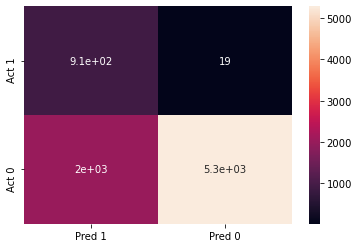

In [118]:
cm_SVCminmax_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_SVCminmax_undersample, labels=[1, 0]) 
df_cm_SVCminmax_undersample = pd.DataFrame(cm_SVCminmax_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_SVCminmax_undersample, annot=True)

In [119]:
roc_auc_score(y_test_dummy, y_pred_dummy_SVCminmax_undersample)

0.851390838011227

In [121]:
model_dummySVC_undersample2.best_params_

{'C': 1, 'class_weight': None, 'gamma': 464.1588833612773}

In [122]:
model_dummySVC_undersample2.best_score_

0.8762128969566318

In [31]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy3)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummySVC_auc_undersample2 = SVC(probability = True, C = 1, class_weight = None, gamma = 464.1588833612773)

model_dummySVC_auc_undersample2.fit(X_train_minmaxscaled_balance, y_train_dummy3)

SVC(C=1, gamma=464.1588833612773, probability=True)

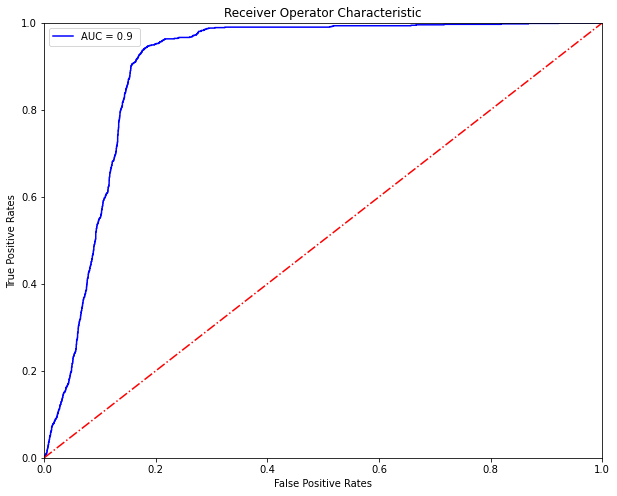

In [32]:
probs = model_dummySVC_auc_undersample2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [123]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy3)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummySVC_undersample3 = SVC()

params_dummySVC = {
    "C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "gamma" : np.logspace(-4, 4, 7),    
    "class_weight" : [None, "balanced"]
}

model_dummySVC_undersample3 = GridSearchCV(model_dummySVC_undersample3, params_dummySVC, cv=3, n_jobs=-1, verbose=1)

model_dummySVC_undersample3.fit(X_train_standardscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  2.2min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00,
       2.15443469e+01, 4.64158883e+02, 1.00000000e+04])},
             verbose=1)

In [124]:
y_pred_dummy_SVCstandard_undersample = model_dummySVC_undersample3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_SVCstandard_undersample))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7310
           1       0.11      1.00      0.20       928

    accuracy                           0.11      8238
   macro avg       0.06      0.50      0.10      8238
weighted avg       0.01      0.11      0.02      8238



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


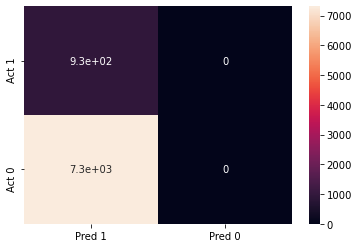

In [125]:
cm_SVCstandard_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_SVCstandard_undersample, labels=[1, 0]) 
df_cm_SVCstandard_undersample = pd.DataFrame(cm_SVCstandard_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_SVCstandard_undersample, annot=True)

In [126]:
roc_auc_score(y_test_dummy, y_pred_dummy_SVCstandard_undersample)

0.5

In [127]:
model_dummySVC_undersample3.best_params_

{'C': 1, 'class_weight': None, 'gamma': 21.54434690031882}

In [128]:
model_dummySVC_undersample3.best_score_

0.8732494984879787

In [33]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy3)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummySVC_auc_undersample3 = SVC(probability = True, C = 1, class_weight = None, gamma = 21.54434690031882)

model_dummySVC_auc_undersample3.fit(X_train_standardscaled_balance, y_train_dummy3)

SVC(C=1, gamma=21.54434690031882, probability=True)

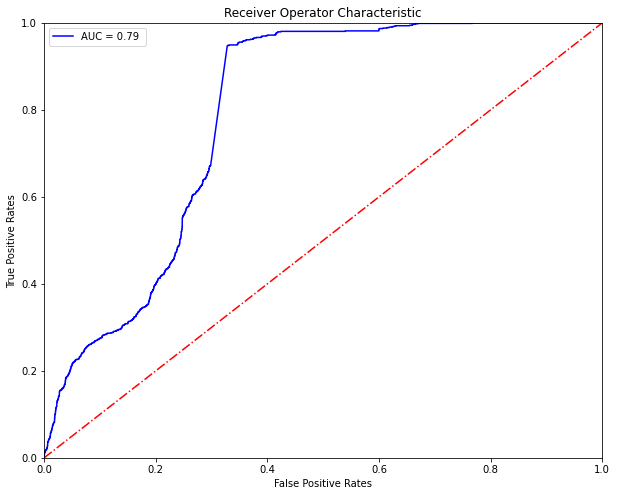

In [34]:
probs = model_dummySVC_auc_undersample3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

## Extreme Gradient Boosting (XGBoost) Classifier - Undersampling

In [129]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_dummy3)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyXGB_undersample = XGBClassifier()

params_dummyXGB = {
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 1],    
    "n_estimators" : [100, 300, 500, 700, 1000],
    "gamma" : [0, 0.3, 0.5, 0.7, 1],
}

model_dummyXGB_undersample = GridSearchCV(model_dummyXGB_undersample, params_dummyXGB, cv=3, n_jobs=-1, verbose=1)

model_dummyXGB_undersample.fit(X_train_robustscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.8min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [130]:
y_pred_dummy_XGBrobust_undersample = model_dummyXGB_undersample.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_XGBrobust_undersample))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71      7310
           1       0.22      0.99      0.36       928

    accuracy                           0.60      8238
   macro avg       0.61      0.77      0.53      8238
weighted avg       0.91      0.60      0.67      8238



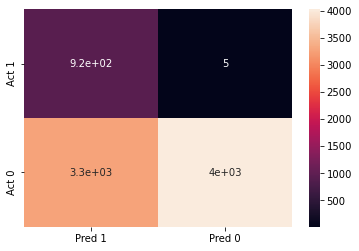

In [131]:
cm_XGBrobust_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_XGBrobust_undersample, labels=[1, 0]) 
df_cm_XGBrobust_undersample = pd.DataFrame(cm_XGBrobust_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_XGBrobust_undersample, annot=True)

In [158]:
roc_auc_score(y_test_dummy, y_pred_dummy_XGBrobust_undersample)

0.772545432567574

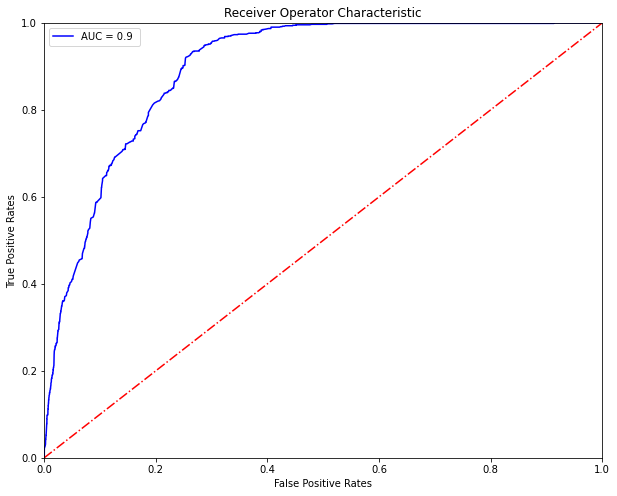

In [132]:
probs = model_dummyXGB_undersample.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [133]:
model_dummyXGB_undersample.best_params_

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [134]:
model_dummyXGB_undersample.best_score_

0.8833520872971157

In [135]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_dummy3)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyXGB_undersample2 = XGBClassifier()

params_dummyXGB = {
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 1],    
    "n_estimators" : [100, 300, 500, 700, 1000],
    "gamma" : [0, 0.3, 0.5, 0.7, 1],
}

model_dummyXGB_undersample2 = GridSearchCV(model_dummyXGB_undersample2, params_dummyXGB, cv=3, n_jobs=-1, verbose=1)

model_dummyXGB_undersample2.fit(X_train_minmaxscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.0min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [136]:
y_pred_dummy_XGBminmax_undersample = model_dummyXGB_undersample2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_XGBminmax_undersample))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      7310
           1       0.38      0.94      0.54       928

    accuracy                           0.82      8238
   macro avg       0.69      0.87      0.72      8238
weighted avg       0.92      0.82      0.85      8238



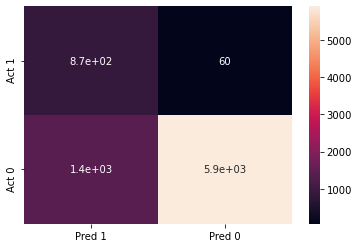

In [137]:
cm_XGBminmax_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_XGBminmax_undersample, labels=[1, 0]) 
df_cm_XGBminmax_undersample = pd.DataFrame(cm_XGBminmax_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_XGBminmax_undersample, annot=True)

In [159]:
roc_auc_score(y_test_dummy, y_pred_dummy_XGBminmax_undersample)

0.8712975847917355

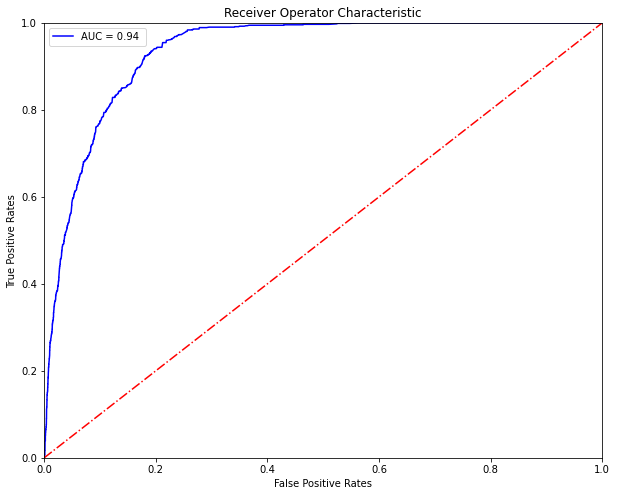

In [138]:
probs = model_dummyXGB_undersample2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [139]:
model_dummyXGB_undersample2.best_params_

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [140]:
model_dummyXGB_undersample2.best_score_

0.8833520872971157

In [141]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_dummy3)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyXGB_undersample3 = XGBClassifier()

params_dummyXGB = {
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 1],    
    "n_estimators" : [100, 300, 500, 700, 1000],
    "gamma" : [0, 0.3, 0.5, 0.7, 1],
}

model_dummyXGB_undersample3 = GridSearchCV(model_dummyXGB_undersample3, params_dummyXGB, cv=3, n_jobs=-1, verbose=1)

model_dummyXGB_undersample3.fit(X_train_standardscaled_balance, y_train_dummy3)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.5min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [142]:
y_pred_dummy_XGBstandard_undersample = model_dummyXGB_undersample3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_XGBstandard_undersample))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72      7310
           1       0.22      0.99      0.37       928

    accuracy                           0.61      8238
   macro avg       0.61      0.78      0.54      8238
weighted avg       0.91      0.61      0.68      8238



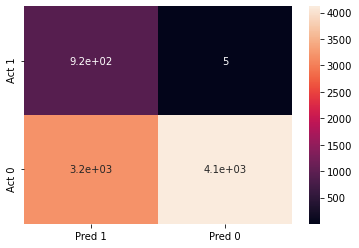

In [143]:
cm_XGBstandard_undersample = confusion_matrix(y_test_dummy, y_pred_dummy_XGBstandard_undersample, labels=[1, 0]) 
df_cm_XGBstandard_undersample = pd.DataFrame(cm_XGBstandard_undersample, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_XGBstandard_undersample, annot=True)

In [160]:
roc_auc_score(y_test_dummy, y_pred_dummy_XGBstandard_undersample)

0.7789065816783811

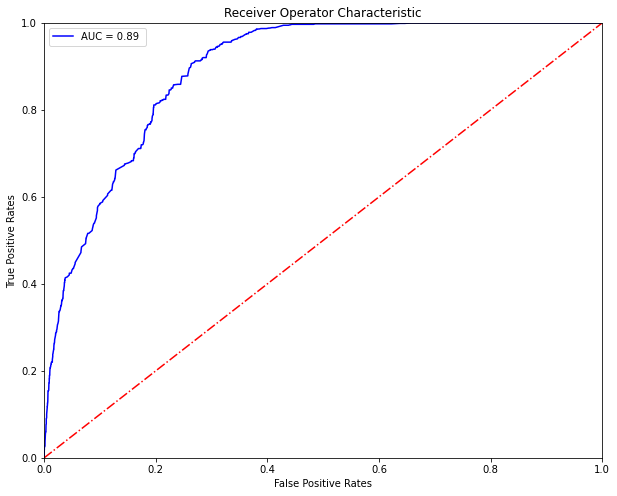

In [144]:
probs = model_dummyXGB_undersample3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [145]:
model_dummyXGB_undersample3.best_params_

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [146]:
model_dummyXGB_undersample3.best_score_

0.8833520872971157

## Synthetic Minority Oversampling Technique (SMOTE)

In [35]:
sm = SMOTE(random_state=42)

In [36]:
X_dummy = df_dummy.drop(columns='y')
y_dummy = df_dummy.y

X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_dummy, y_dummy, stratify = y_dummy, test_size = .2, random_state=42)

In [37]:
X_train_sm, y_train_sm = sm.fit_sample(X_train_dummy, y_train_dummy)

In [40]:
X_train_dummy.shape

(32950, 9)

In [39]:
X_train_sm.shape

(58476, 9)

## K Neighbors Classifier - SMOTE

In [154]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_sm)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyKNN_smote = KNeighborsClassifier()

params_dummyKNN = {
    "n_neighbors" : range(1,50,2),
    "weights" : ["uniform", "distance"],
    "p" : [2, 1]
}

model_dummyKNN_smote = GridSearchCV(model_dummyKNN_smote, params_dummyKNN, cv=3, n_jobs=-1, verbose=1)

model_dummyKNN_smote.fit(X_train_robustscaled_balance, y_train_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.6min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50, 2), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [155]:
y_pred_dummy_KNNrobust_smote = model_dummyKNN_smote.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_KNNrobust_smote))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79      7310
           1       0.25      0.86      0.38       928

    accuracy                           0.69      8238
   macro avg       0.61      0.76      0.59      8238
weighted avg       0.89      0.69      0.75      8238



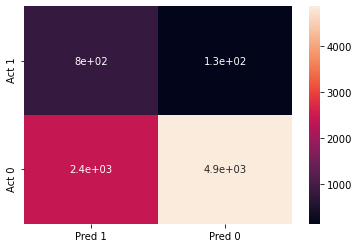

In [156]:
cm_KNNrobust_smote = confusion_matrix(y_test_dummy, y_pred_dummy_KNNrobust_smote, labels=[1, 0]) 
df_cm_KNNrobust_smote = pd.DataFrame(cm_KNNrobust_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_KNNrobust_smote, annot=True)

In [162]:
roc_auc_score(y_test_dummy, y_pred_dummy_KNNrobust_smote)

0.7637378237180998

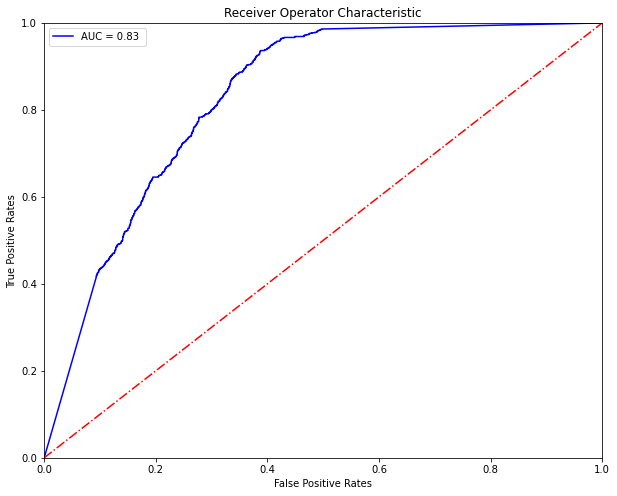

In [157]:
probs = model_dummyKNN_smote.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [163]:
model_dummyKNN_smote.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [164]:
model_dummyKNN_smote.best_score_

0.913810794171968

In [165]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_sm)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyKNN_smote2 = KNeighborsClassifier()

params_dummyKNN = {
    "n_neighbors" : range(1,50,2),
    "weights" : ["uniform", "distance"],
    "p" : [2, 1]
}

model_dummyKNN_smote2 = GridSearchCV(model_dummyKNN_smote2, params_dummyKNN, cv=3, n_jobs=-1, verbose=1)

model_dummyKNN_smote2.fit(X_train_minmaxscaled_balance, y_train_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.1min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50, 2), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [166]:
y_pred_dummy_KNNminmax_smote = model_dummyKNN_smote2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_KNNminmax_smote))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      7310
           1       0.35      0.85      0.50       928

    accuracy                           0.81      8238
   macro avg       0.66      0.83      0.69      8238
weighted avg       0.91      0.81      0.84      8238



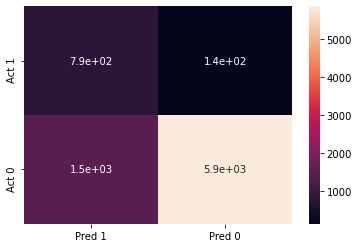

In [168]:
cm_KNNminmax_smote = confusion_matrix(y_test_dummy, y_pred_dummy_KNNminmax_smote, labels=[1, 0]) 
df_cm_KNNminmax_smote = pd.DataFrame(cm_KNNminmax_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_KNNminmax_smote, annot=True)

In [169]:
roc_auc_score(y_test_dummy, y_pred_dummy_KNNminmax_smote)

0.8260569484409641

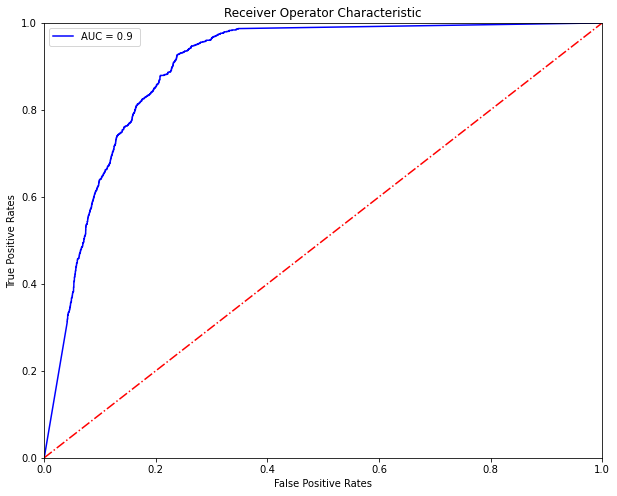

In [170]:
probs = model_dummyKNN_smote2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [171]:
model_dummyKNN_smote2.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [172]:
model_dummyKNN_smote2.best_score_

0.9165469594363499

In [173]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_sm)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyKNN_smote3 = KNeighborsClassifier()

params_dummyKNN = {
    "n_neighbors" : range(1,50,2),
    "weights" : ["uniform", "distance"],
    "p" : [2, 1]
}

model_dummyKNN_smote3 = GridSearchCV(model_dummyKNN_smote3, params_dummyKNN, cv=3, n_jobs=-1, verbose=1)

model_dummyKNN_smote3.fit(X_train_standardscaled_balance, y_train_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50, 2), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [174]:
y_pred_dummy_KNNstandard_smote = model_dummyKNN_smote3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_KNNstandard_smote))

              precision    recall  f1-score   support

           0       0.98      0.30      0.46      7310
           1       0.15      0.95      0.26       928

    accuracy                           0.38      8238
   macro avg       0.56      0.63      0.36      8238
weighted avg       0.89      0.38      0.44      8238



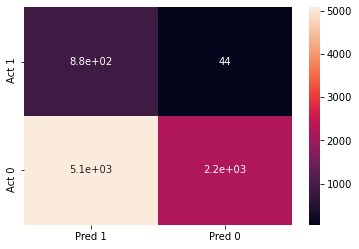

In [175]:
cm_KNNstandard_smote = confusion_matrix(y_test_dummy, y_pred_dummy_KNNstandard_smote, labels=[1, 0]) 
df_cm_KNNstandard_smote = pd.DataFrame(cm_KNNstandard_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_KNNstandard_smote, annot=True)

In [176]:
roc_auc_score(y_test_dummy, y_pred_dummy_KNNstandard_smote)

0.6282766875796029

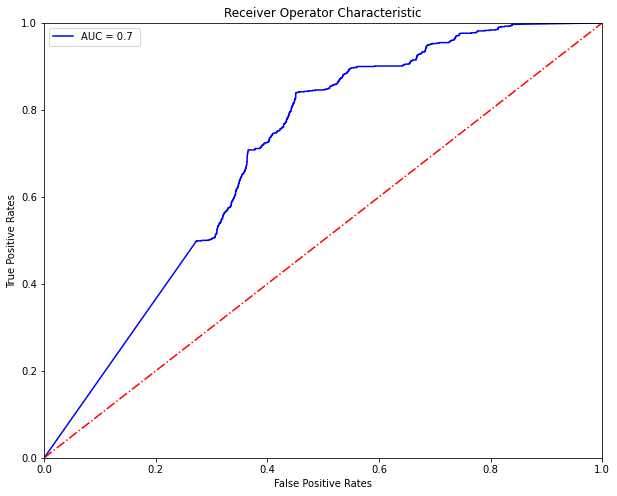

In [177]:
probs = model_dummyKNN_smote3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [178]:
model_dummyKNN_smote3.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [179]:
model_dummyKNN_smote3.best_score_

0.9147513509815992

## Decision Tree Classifier - SMOTE

In [181]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_sm)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyDT_smote = DecisionTreeClassifier()

params_dummyDT = {
    "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    
    "min_samples_split" : range(2,30,1),
    "min_samples_leaf" : range(1,15,1),
    "max_features" : ["auto", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

model_dummyDT_smote = GridSearchCV(model_dummyDT_smote, params_dummyDT, cv=3, n_jobs=-1, verbose=1)

model_dummyDT_smote.fit(X_train_robustscaled_balance, y_train_sm)

Fitting 3 folds for each of 47432 candidates, totalling 142296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 2440 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 3740 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 5240 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 8840 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 10940 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 13464 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 18464 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 23864 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 29664 tasks   

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [182]:
y_pred_dummy_DTrobust_smote = model_dummyDT_smote.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_DTrobust_smote))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      7310
           1       0.19      0.63      0.29       928

    accuracy                           0.66      8238
   macro avg       0.56      0.64      0.53      8238
weighted avg       0.85      0.66      0.72      8238



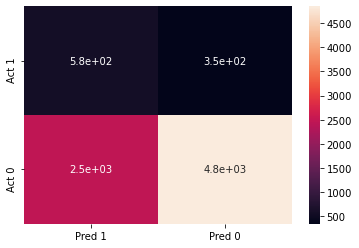

In [183]:
cm_DTrobust_smote = confusion_matrix(y_test_dummy, y_pred_dummy_DTrobust_smote, labels=[1, 0]) 
df_cm_DTrobust_smote = pd.DataFrame(cm_DTrobust_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_DTrobust_smote, annot=True)

In [184]:
roc_auc_score(y_test_dummy, y_pred_dummy_DTrobust_smote)

0.6443657424878532

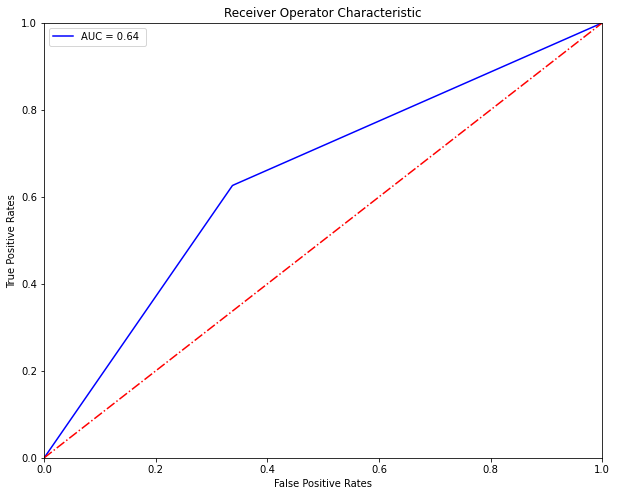

In [185]:
probs = model_dummyDT_smote.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [186]:
model_dummyDT_smote.best_params_

{'max_depth': None,
 'max_features': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [187]:
model_dummyDT_smote.best_score_

0.9194541350297558

In [188]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_sm)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyDT_smote2 = DecisionTreeClassifier()

params_dummyDT = {
    "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    
    "min_samples_split" : range(2,30,1),
    "min_samples_leaf" : range(1,15,1),
    "max_features" : ["auto", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

model_dummyDT_smote2 = GridSearchCV(model_dummyDT_smote2, params_dummyDT, cv=3, n_jobs=-1, verbose=1)

model_dummyDT_smote2.fit(X_train_minmaxscaled_balance, y_train_sm)

Fitting 3 folds for each of 47432 candidates, totalling 142296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 2112 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 3412 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 4912 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6612 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 8512 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 10612 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 12912 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 17800 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 23200 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 29000 tasks   

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [189]:
y_pred_dummy_DTminmax_smote = model_dummyDT_smote2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_DTminmax_smote))

              precision    recall  f1-score   support

           0       0.94      0.53      0.68      7310
           1       0.16      0.73      0.27       928

    accuracy                           0.55      8238
   macro avg       0.55      0.63      0.47      8238
weighted avg       0.85      0.55      0.63      8238



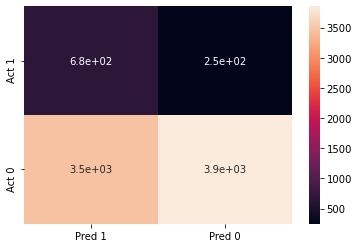

In [190]:
cm_DTminmax_smote = confusion_matrix(y_test_dummy, y_pred_dummy_DTminmax_smote, labels=[1, 0]) 
df_cm_DTminmax_smote = pd.DataFrame(cm_DTminmax_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_DTminmax_smote, annot=True)

In [191]:
roc_auc_score(y_test_dummy, y_pred_dummy_DTminmax_smote)

0.6292468099910373

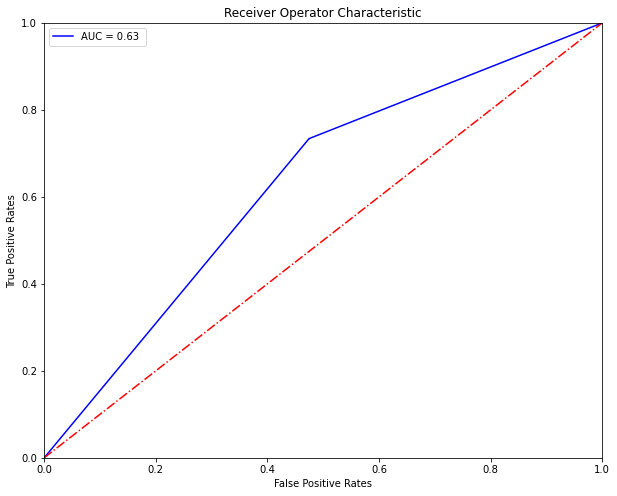

In [192]:
probs = model_dummyDT_smote2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [193]:
model_dummyDT_smote2.best_params_

{'max_depth': None,
 'max_features': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [194]:
model_dummyDT_smote2.best_score_

0.9177782338053219

In [196]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_sm)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyDT_smote3 = DecisionTreeClassifier()

params_dummyDT = {
    "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    
    "min_samples_split" : range(2,30,1),
    "min_samples_leaf" : range(1,15,1),
    "max_features" : ["auto", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

model_dummyDT_smote3 = GridSearchCV(model_dummyDT_smote3, params_dummyDT, cv=3, n_jobs=-1, verbose=1)

model_dummyDT_smote3.fit(X_train_standardscaled_balance, y_train_sm)

Fitting 3 folds for each of 47432 candidates, totalling 142296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 12052 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 15696 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 20696 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 26096 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 31896 tasks  

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [197]:
y_pred_dummy_DTstandard_smote = model_dummyDT_smote3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_DTstandard_smote))

              precision    recall  f1-score   support

           0       0.87      0.23      0.37      7310
           1       0.11      0.73      0.19       928

    accuracy                           0.29      8238
   macro avg       0.49      0.48      0.28      8238
weighted avg       0.79      0.29      0.35      8238



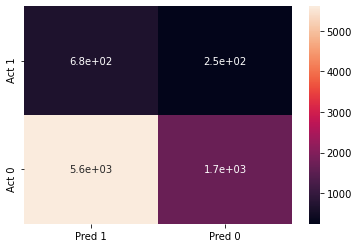

In [198]:
cm_DTstandard_smote = confusion_matrix(y_test_dummy, y_pred_dummy_DTstandard_smote, labels=[1, 0]) 
df_cm_DTstandard_smote = pd.DataFrame(cm_DTstandard_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_DTstandard_smote, annot=True)

In [199]:
roc_auc_score(y_test_dummy, y_pred_dummy_DTstandard_smote)

0.48360756993254395

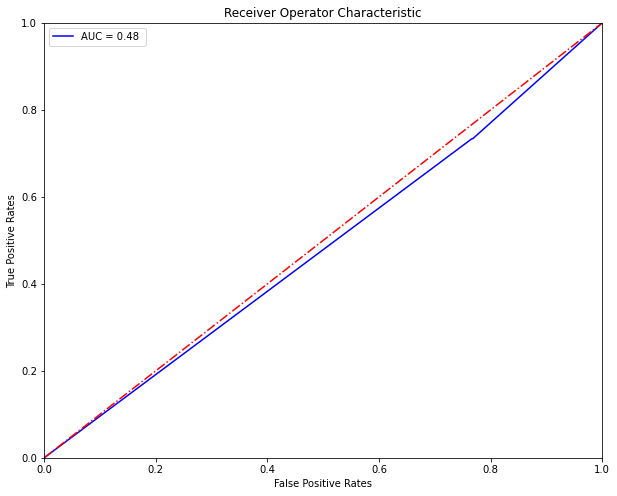

In [200]:
probs = model_dummyDT_smote3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [201]:
model_dummyDT_smote3.best_params_

{'max_depth': None,
 'max_features': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [202]:
model_dummyDT_smote3.best_score_

0.9170599904234216

## Random Forest Classifier - SMOTE

In [203]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_sm)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyRF_smote = RandomForestClassifier()

params_dummyRF = {
    "n_estimators" : [100, 400, 700, 1000],  
    "max_depth" : [None, 2, 4, 6, 8, 10],
    "min_samples_split" : [2,6,10],
    "min_samples_leaf" : [1,3,5],
    "max_features" : ["auto", 0.25, 0.5, 0.75, 1]
}

model_dummyRF_smote = GridSearchCV(model_dummyRF_smote, params_dummyRF, cv=3, n_jobs=-1, verbose=1)

model_dummyRF_smote.fit(X_train_robustscaled_balance, y_train_sm)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 70.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 100.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 136.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 192.1min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 195.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 0.25, 0.5, 0.75, 1],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             verbose=1)

In [204]:
y_pred_dummy_RFrobust_smote = model_dummyRF_smote.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_RFrobust_smote))

              precision    recall  f1-score   support

           0       0.97      0.61      0.75      7310
           1       0.21      0.83      0.34       928

    accuracy                           0.63      8238
   macro avg       0.59      0.72      0.54      8238
weighted avg       0.88      0.63      0.70      8238



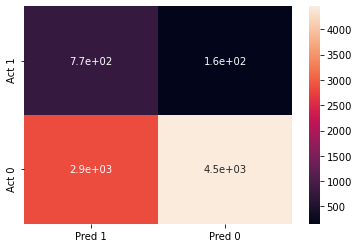

In [205]:
cm_RFrobust_smote = confusion_matrix(y_test_dummy, y_pred_dummy_RFrobust_smote, labels=[1, 0]) 
df_cm_RFrobust_smote = pd.DataFrame(cm_RFrobust_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_RFrobust_smote, annot=True)

In [206]:
roc_auc_score(y_test_dummy, y_pred_dummy_RFrobust_smote)

0.7193850535402613

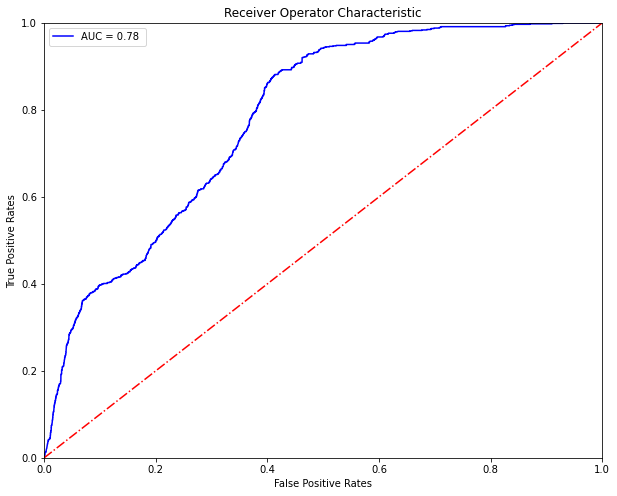

In [207]:
probs = model_dummyRF_smote.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [208]:
model_dummyRF_smote.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [209]:
model_dummyRF_smote.best_score_

0.9302790888569669

In [14]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_sm)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyRF_smote2 = RandomForestClassifier()

params_dummyRF = {
    "n_estimators" : [100, 400, 700, 1000],  
    "max_depth" : [None, 2, 4, 6, 8, 10],
    "min_samples_split" : [2,6,10],
    "min_samples_leaf" : [1,3,5],
    "max_features" : ["auto", 0.25, 0.5, 0.75, 1]
}

model_dummyRF_smote2 = GridSearchCV(model_dummyRF_smote2, params_dummyRF, cv=3, n_jobs=-1, verbose=1)

model_dummyRF_smote2.fit(X_train_minmaxscaled_balance, y_train_sm)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 58.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 76.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 97.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 131.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 181.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 233.5min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 236.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 0.25, 0.5, 0.75, 1],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             verbose=1)

In [15]:
y_pred_dummy_RFminmax_smote = model_dummyRF_smote2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_RFminmax_smote))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7310
           1       0.36      0.81      0.50       928

    accuracy                           0.82      8238
   macro avg       0.67      0.82      0.69      8238
weighted avg       0.90      0.82      0.85      8238



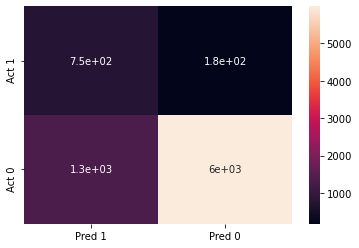

In [16]:
cm_RFminmax_smote = confusion_matrix(y_test_dummy, y_pred_dummy_RFminmax_smote, labels=[1, 0]) 
df_cm_RFminmax_smote = pd.DataFrame(cm_RFminmax_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_RFminmax_smote, annot=True)

In [17]:
roc_auc_score(y_test_dummy, y_pred_dummy_RFminmax_smote)

0.8151503313835557

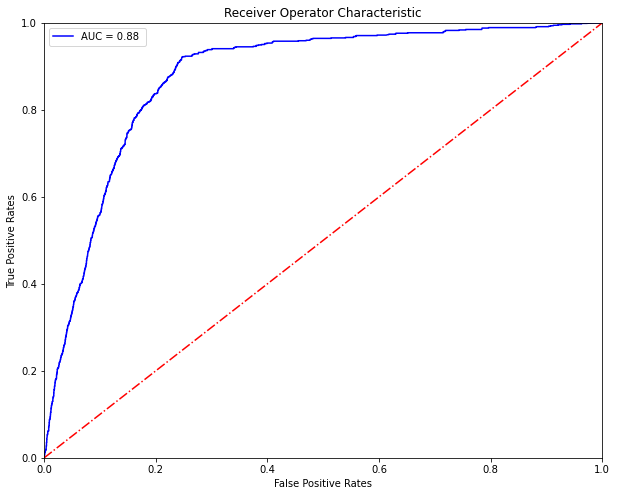

In [18]:
probs = model_dummyRF_smote2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [19]:
model_dummyRF_smote2.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 700}

In [20]:
model_dummyRF_smote2.best_score_

0.930775018811136

In [21]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_sm)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyRF_smote3 = RandomForestClassifier()

params_dummyRF = {
    "n_estimators" : [100, 400, 700, 1000],  
    "max_depth" : [None, 2, 4, 6, 8, 10],
    "min_samples_split" : [2,6,10],
    "min_samples_leaf" : [1,3,5],
    "max_features" : ["auto", 0.25, 0.5, 0.75, 1]
}

model_dummyRF_smote3 = GridSearchCV(model_dummyRF_smote3, params_dummyRF, cv=3, n_jobs=-1, verbose=1)

model_dummyRF_smote3.fit(X_train_standardscaled_balance, y_train_sm)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 90.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 176.9min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 179.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 0.25, 0.5, 0.75, 1],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             verbose=1)

In [22]:
y_pred_dummy_RFstandard_smote = model_dummyRF_smote3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_RFstandard_smote))

              precision    recall  f1-score   support

           0       0.97      0.18      0.30      7310
           1       0.13      0.95      0.23       928

    accuracy                           0.27      8238
   macro avg       0.55      0.56      0.26      8238
weighted avg       0.87      0.27      0.29      8238



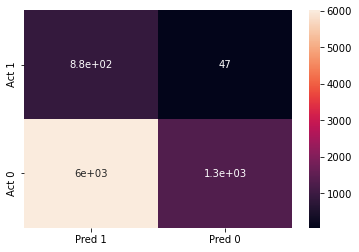

In [23]:
cm_RFstandard_smote = confusion_matrix(y_test_dummy, y_pred_dummy_RFstandard_smote, labels=[1, 0]) 
df_cm_RFstandard_smote = pd.DataFrame(cm_RFstandard_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_RFstandard_smote, annot=True)

In [24]:
roc_auc_score(y_test_dummy, y_pred_dummy_RFstandard_smote)

0.5638696105948394

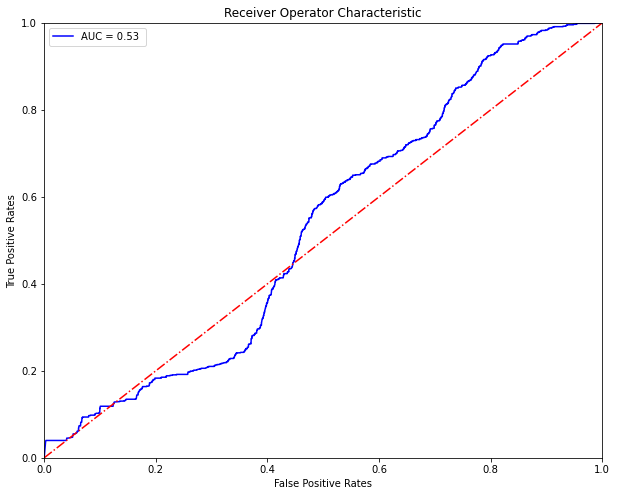

In [25]:
probs = model_dummyRF_smote3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [26]:
model_dummyRF_smote3.best_params_

{'max_depth': None,
 'max_features': 0.25,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 700}

In [27]:
model_dummyRF_smote3.best_score_

0.9302448867911622

## Support Vector Machine (SVM) Classifier - SMOTE

In [28]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_sm)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummySVC_smote = SVC()

params_dummySVC = {
    "C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "gamma" : np.logspace(-4, 4, 7),    
    "class_weight" : [None, "balanced"]
}

model_dummySVC_smote = GridSearchCV(model_dummySVC_smote, params_dummySVC, cv=3, n_jobs=-1, verbose=1)

model_dummySVC_smote.fit(X_train_robustscaled_balance, y_train_sm)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 83.0min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 204.3min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00,
       2.15443469e+01, 4.64158883e+02, 1.00000000e+04])},
             verbose=1)

In [29]:
y_pred_dummy_SVCrobust_smote = model_dummySVC_smote.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_SVCrobust_smote))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7310
           1       0.11      1.00      0.20       928

    accuracy                           0.11      8238
   macro avg       0.06      0.50      0.10      8238
weighted avg       0.01      0.11      0.02      8238



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


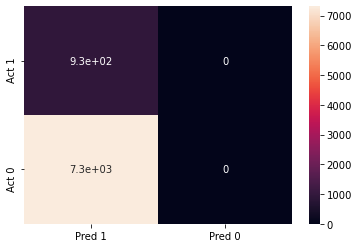

In [30]:
cm_SVCrobust_smote = confusion_matrix(y_test_dummy, y_pred_dummy_SVCrobust_smote, labels=[1, 0]) 
df_cm_SVCrobust_smote = pd.DataFrame(cm_SVCrobust_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_SVCrobust_smote, annot=True)

In [31]:
roc_auc_score(y_test_dummy, y_pred_dummy_SVCrobust_smote)

0.5

In [33]:
model_dummySVC_smote.best_params_

{'C': 1, 'class_weight': None, 'gamma': 10000.0}

In [34]:
model_dummySVC_smote.best_score_

0.9004206854093987

In [41]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_sm)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummySVC_auc_smote = SVC(probability = True, C = 1, class_weight = None, gamma = 10000.0)

model_dummySVC_auc_smote.fit(X_train_robustscaled_balance, y_train_sm)

SVC(C=1, gamma=10000.0, probability=True)

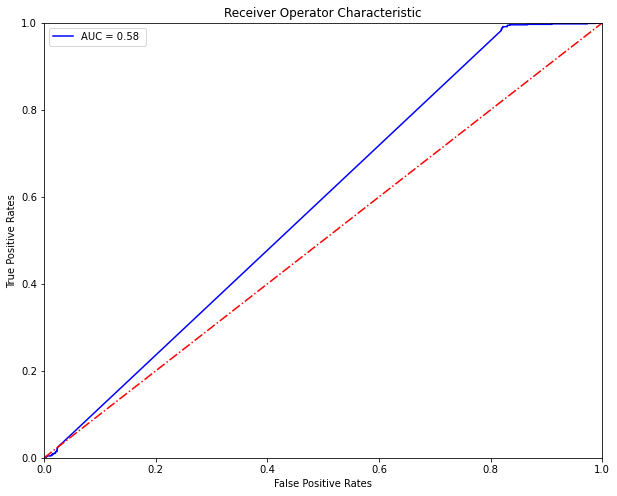

In [42]:
probs = model_dummySVC_auc_smote.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [35]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_sm)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummySVC_smote2 = SVC()

params_dummySVC = {
    "C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "gamma" : np.logspace(-4, 4, 7),    
    "class_weight" : [None, "balanced"]
}

model_dummySVC_smote2 = GridSearchCV(model_dummySVC_smote2, params_dummySVC, cv=3, n_jobs=-1, verbose=1)

model_dummySVC_smote2.fit(X_train_minmaxscaled_balance, y_train_sm)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 69.7min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 157.9min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00,
       2.15443469e+01, 4.64158883e+02, 1.00000000e+04])},
             verbose=1)

In [36]:
y_pred_dummy_SVCminmax_smote = model_dummySVC_smote2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_SVCminmax_smote))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61      7310
           1       0.18      0.97      0.30       928

    accuracy                           0.50      8238
   macro avg       0.59      0.70      0.46      8238
weighted avg       0.90      0.50      0.57      8238



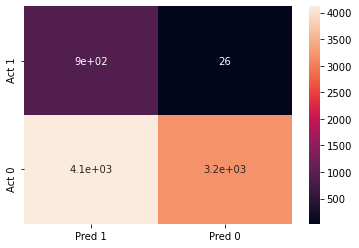

In [37]:
cm_SVCminmax_smote = confusion_matrix(y_test_dummy, y_pred_dummy_SVCminmax_smote, labels=[1, 0]) 
df_cm_SVCminmax_smote = pd.DataFrame(cm_SVCminmax_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_SVCminmax_smote, annot=True)

In [38]:
roc_auc_score(y_test_dummy, y_pred_dummy_SVCminmax_smote)

0.7044592315675267

In [40]:
model_dummySVC_smote2.best_params_

{'C': 1, 'class_weight': None, 'gamma': 10000.0}

In [41]:
model_dummySVC_smote2.best_score_

0.8988302893494767

In [43]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_sm)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummySVC_auc_smote2 = SVC(probability = True, C = 1, class_weight = None, gamma = 10000.0)

model_dummySVC_auc_smote2.fit(X_train_minmaxscaled_balance, y_train_sm)

SVC(C=1, gamma=10000.0, probability=True)

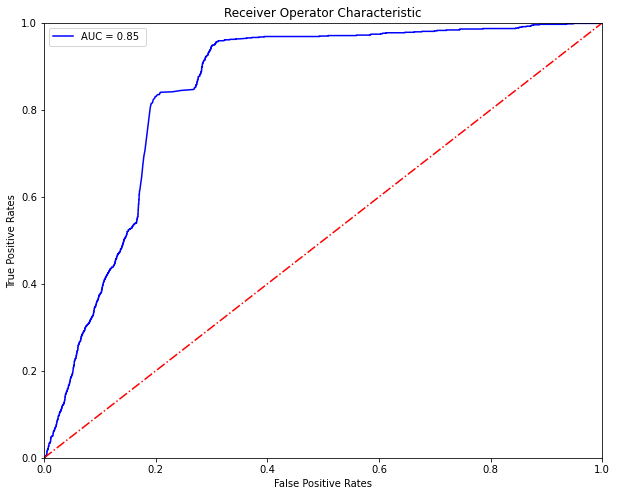

In [44]:
probs = model_dummySVC_auc_smote2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [47]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_sm)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummySVC_smote3 = SVC()

params_dummySVC = {
    "C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "gamma" : np.logspace(-4, 4, 7),    
    "class_weight" : [None, "balanced"]
}

model_dummySVC_smote3 = GridSearchCV(model_dummySVC_smote3, params_dummySVC, cv=3, n_jobs=-1, verbose=1)

model_dummySVC_smote3.fit(X_train_minmaxscaled_balance, y_train_sm)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 64.4min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 146.4min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': [None, 'balanced'],
                         'gamma': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00,
       2.15443469e+01, 4.64158883e+02, 1.00000000e+04])},
             verbose=1)

In [48]:
y_pred_dummy_SVCstandard_smote = model_dummySVC_smote3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_SVCstandard_smote))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7310
           1       0.11      1.00      0.20       928

    accuracy                           0.11      8238
   macro avg       0.06      0.50      0.10      8238
weighted avg       0.01      0.11      0.02      8238



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


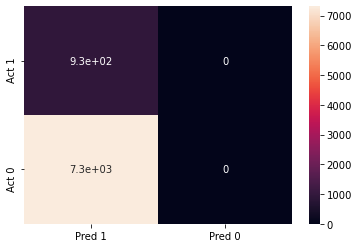

In [49]:
cm_SVCstandard_smote = confusion_matrix(y_test_dummy, y_pred_dummy_SVCstandard_smote, labels=[1, 0]) 
df_cm_SVCstandard_smote = pd.DataFrame(cm_SVCstandard_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_SVCstandard_smote, annot=True)

In [50]:
roc_auc_score(y_test_dummy, y_pred_dummy_SVCstandard_smote)

0.5

In [51]:
model_dummySVC_smote3.best_params_

{'C': 1, 'class_weight': None, 'gamma': 10000.0}

In [52]:
model_dummySVC_smote3.best_score_

0.8988302893494767

In [45]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_sm)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummySVC_auc_smote3 = SVC(probability = True, C = 1, class_weight = None, gamma = 10000.0)

model_dummySVC_auc_smote3.fit(X_train_standardscaled_balance, y_train_sm)

SVC(C=1, gamma=10000.0, probability=True)

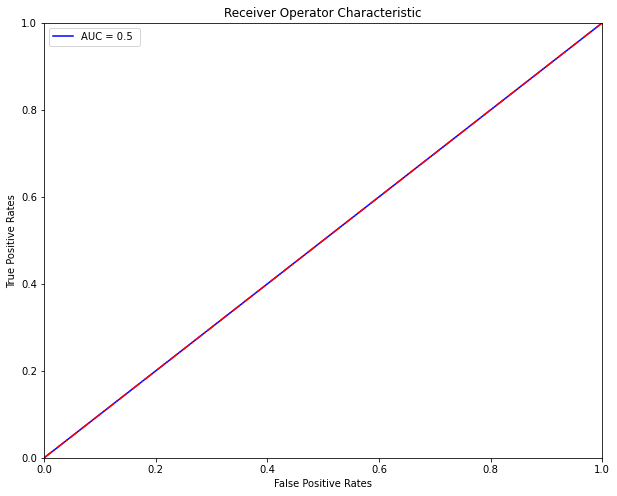

In [46]:
probs = model_dummySVC_auc_smote3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

## Extreme Gradient Boosting (XGBoost) - SMOTE

In [48]:
scaler_robust = RobustScaler()

X_train_robustscaled_balance = scaler_robust.fit_transform(X_train_sm)

X_test_robustscaled_balance = scaler_robust.fit_transform(X_test_dummy)

model_dummyXGB_smote = XGBClassifier()

params_dummyXGB = {
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 1],    
    "n_estimators" : [100, 300, 500, 700, 1000],
    "gamma" : [0, 0.3, 0.5, 0.7, 1],
}

model_dummyXGB_smote = GridSearchCV(model_dummyXGB_smote, params_dummyXGB, cv=3, n_jobs=-1, verbose=1)

model_dummyXGB_smote.fit(X_train_robustscaled_balance, y_train_sm)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 66.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 80.5min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [49]:
y_pred_dummy_XGBrobust_smote = model_dummyXGB_smote.predict(X_test_robustscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_XGBrobust_smote))

              precision    recall  f1-score   support

           0       0.97      0.55      0.71      7310
           1       0.20      0.89      0.33       928

    accuracy                           0.59      8238
   macro avg       0.59      0.72      0.52      8238
weighted avg       0.89      0.59      0.66      8238



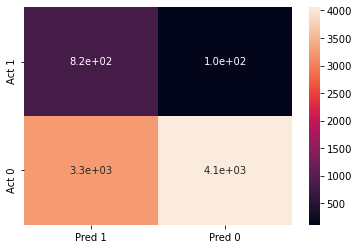

In [50]:
cm_XGBrobust_smote = confusion_matrix(y_test_dummy, y_pred_dummy_XGBrobust_smote, labels=[1, 0]) 
df_cm_XGBrobust_smote = pd.DataFrame(cm_XGBrobust_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_XGBrobust_smote, annot=True)

In [51]:
roc_auc_score(y_test_dummy, y_pred_dummy_XGBrobust_smote)

0.7209233041652907

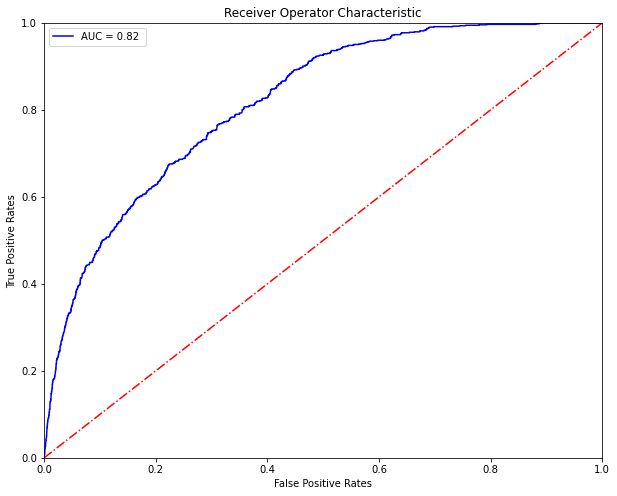

In [52]:
probs = model_dummyXGB_smote.predict_proba(X_test_robustscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [53]:
model_dummyXGB_smote.best_params_

{'gamma': 0, 'learning_rate': 0.7, 'max_depth': 10, 'n_estimators': 100}

In [54]:
model_dummyXGB_smote.best_score_

0.9334085778781039

In [55]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled_balance = scaler_minmax.fit_transform(X_train_sm)

X_test_minmaxscaled_balance = scaler_minmax.fit_transform(X_test_dummy)

model_dummyXGB_smote2 = XGBClassifier()

params_dummyXGB = {
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 1],    
    "n_estimators" : [100, 300, 500, 700, 1000],
    "gamma" : [0, 0.3, 0.5, 0.7, 1],
}

model_dummyXGB_smote2 = GridSearchCV(model_dummyXGB_smote2, params_dummyXGB, cv=3, n_jobs=-1, verbose=1)

model_dummyXGB_smote2.fit(X_train_minmaxscaled_balance, y_train_sm)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 64.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 78.9min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [56]:
y_pred_dummy_XGBminmax_smote = model_dummyXGB_smote2.predict(X_test_minmaxscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_XGBminmax_smote))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      7310
           1       0.27      0.88      0.42       928

    accuracy                           0.72      8238
   macro avg       0.63      0.79      0.62      8238
weighted avg       0.90      0.72      0.77      8238



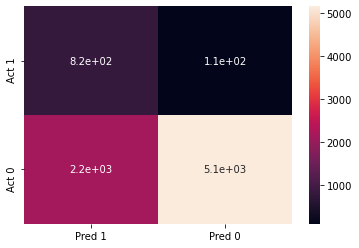

In [57]:
cm_XGBminmax_smote = confusion_matrix(y_test_dummy, y_pred_dummy_XGBminmax_smote, labels=[1, 0]) 
df_cm_XGBminmax_smote = pd.DataFrame(cm_XGBminmax_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_XGBminmax_smote, annot=True)

In [58]:
roc_auc_score(y_test_dummy, y_pred_dummy_XGBminmax_smote)

0.7912367623472805

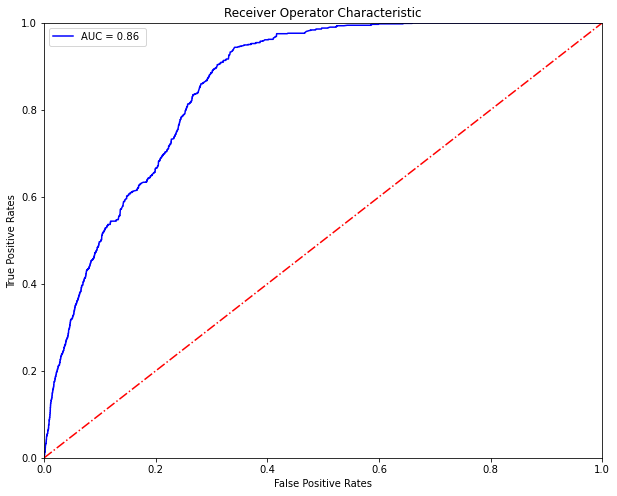

In [59]:
probs = model_dummyXGB_smote2.predict_proba(X_test_minmaxscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [60]:
model_dummyXGB_smote2.best_params_

{'gamma': 0, 'learning_rate': 1, 'max_depth': 10, 'n_estimators': 100}

In [61]:
model_dummyXGB_smote2.best_score_

0.9321944045420344

In [62]:
scaler_standard = StandardScaler()

X_train_standardscaled_balance = scaler_standard.fit_transform(X_train_sm)

X_test_standardscaled_balance = scaler_standard.fit_transform(X_test_dummy)

model_dummyXGB_smote3 = XGBClassifier()

params_dummyXGB = {
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 1],    
    "n_estimators" : [100, 300, 500, 700, 1000],
    "gamma" : [0, 0.3, 0.5, 0.7, 1],
}

model_dummyXGB_smote3 = GridSearchCV(model_dummyXGB_smote3, params_dummyXGB, cv=3, n_jobs=-1, verbose=1)

model_dummyXGB_smote3.fit(X_train_standardscaled_balance, y_train_sm)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 60.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 73.5min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [63]:
y_pred_dummy_XGBstandard_smote = model_dummyXGB_smote3.predict(X_test_standardscaled_balance)

print(classification_report(y_test_dummy, y_pred_dummy_XGBstandard_smote))

              precision    recall  f1-score   support

           0       0.95      0.19      0.31      7310
           1       0.13      0.92      0.22       928

    accuracy                           0.27      8238
   macro avg       0.54      0.55      0.27      8238
weighted avg       0.86      0.27      0.30      8238



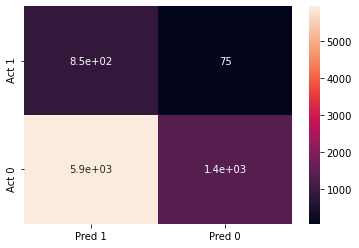

In [64]:
cm_XGBstandard_smote = confusion_matrix(y_test_dummy, y_pred_dummy_XGBstandard_smote, labels=[1, 0]) 
df_cm_XGBstandard_smote = pd.DataFrame(cm_XGBstandard_smote, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_XGBstandard_smote, annot=True)

In [65]:
roc_auc_score(y_test_dummy, y_pred_dummy_XGBstandard_smote)

0.553913362658616

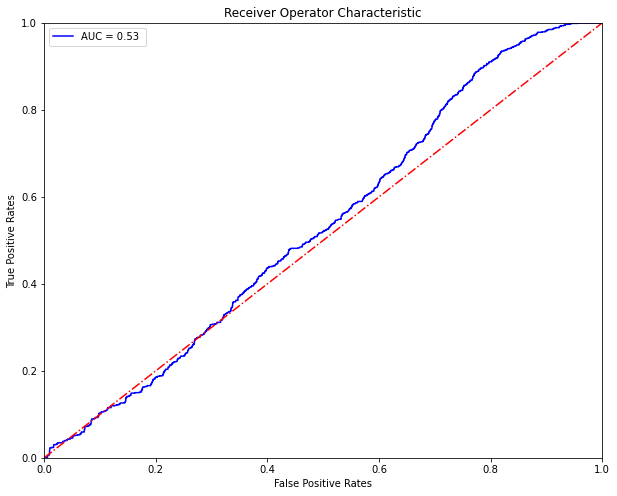

In [66]:
probs = model_dummyXGB_smote3.predict_proba(X_test_standardscaled_balance)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [67]:
model_dummyXGB_smote3.best_params_

{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 300}

In [68]:
model_dummyXGB_smote3.best_score_

0.9334085778781039

### Setelah dibandingkan, model dengan imbalanced data yang tidak dihandle memiliki parameter output (precision, recall, F1-score, AUC-ROC) yang lebih besar daripada jika imbalanced di-handle. Ada 2 model yang diusulkan, yaitu precision biased model (XGBoost Classifier dengan Robust Scaler) dan recall biased model (Decision Tree Classiffier dengan MinMax Scaler). 
### Untuk kondisi normal atau optimal, recall biased model diusulkan karena pengeluaran marketing bagi Bank sebagian besar dalam bentuk biaya telepon (seluler atau non-seluler) dari pihak Bank sedangkan keuntungan yang didapat Bank dari deposito bulanan cenderung lebih besar daripada pengeluaran biaya telepon (dari data tahun 2018, biaya telepon per bulan di Portugal sekitar 50 atau 60 Euro per paket/orang sedangkan data tahun 2020 menunjukkan penghasilan bulanan per orang di Portugal sekitar rata-rata 2750 Euro dari 700 Euro rata-rata paling rendah atau 12300 Euro rata-rata paling tinggi). 
### Jika pengeluaran telepon menjadi sangat signifikan dan melebihi keuntungan yang didapat dari deposito bulanan atau faktor lain yang menghambat kemampuan Bank untuk melakukan marketing, precision biased model dapat digunakan tetapi dengan risiko tidak melakukan marketing kepada nasabah/client yang berpotensial besar menanam deposito.

## Export Model to Dashboard

### Precision Biased Model - Random Forest with Robust Scaler

In [45]:
scaler_robust = RobustScaler()

X_train_robustscaled = scaler_robust.fit_transform(X_train_dummy)

X_test_robustscaled = scaler_robust.fit_transform(X_test_dummy)

model_dummyXGB_default = XGBClassifier()

model_dummyXGB_default.fit(X_train_robustscaled, y_train_dummy)

XGBClassifier()

In [46]:
y_pred_dummy_XGBrobust_default = model_dummyXGB_default.predict(X_test_robustscaled)

print(classification_report(y_test_dummy, y_pred_dummy_XGBrobust_default))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.71      0.51      0.59       928

    accuracy                           0.92      8238
   macro avg       0.82      0.74      0.77      8238
weighted avg       0.91      0.92      0.92      8238



In [9]:
scaler_robust = RobustScaler()

X_train_robustscaled = scaler_robust.fit_transform(X_train_dummy)

X_test_robustscaled = scaler_robust.fit_transform(X_test_dummy)

model_dummyXGB = XGBClassifier()

params_dummyXGB = {
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 1],    
    "n_estimators" : [100, 300, 500, 700, 1000],
    "gamma" : [0, 0.3, 0.5, 0.7, 1],
}

model_dummyXGB = GridSearchCV(model_dummyXGB, params_dummyXGB, cv=3, n_jobs=-1, verbose=1)

model_dummyXGB.fit(X_train_robustscaled, y_train_dummy)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 46.7min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0, 0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             verbose=1)

In [10]:
y_pred_dummy_XGBrobust = model_dummyXGB.predict(X_test_robustscaled)

print(classification_report(y_test_dummy, y_pred_dummy_XGBrobust))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.71      0.53      0.61       928

    accuracy                           0.92      8238
   macro avg       0.82      0.75      0.78      8238
weighted avg       0.92      0.92      0.92      8238



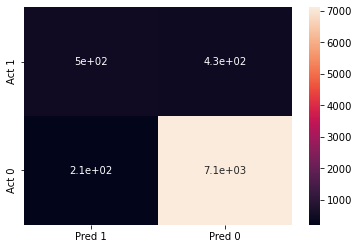

In [13]:
cm_XGBrobust = confusion_matrix(y_test_dummy, y_pred_dummy_XGBrobust, labels=[1, 0]) 
df_cm_XGBrobust = pd.DataFrame(cm_XGBrobust, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_XGBrobust, annot=True)

In [12]:
roc_auc_score(y_test_dummy, y_pred_dummy_XGBrobust)

0.753151092032643

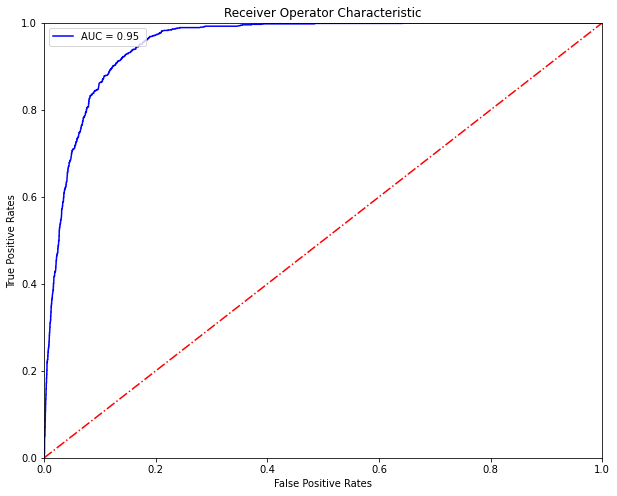

In [14]:
probs = model_dummyXGB.predict_proba(X_test_robustscaled)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [15]:
model_dummyXGB.best_params_

{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [16]:
model_dummyXGB.best_score_

0.9154779212845595

In [24]:
scaler_robust = RobustScaler()

X_train_robustscaled = scaler_robust.fit_transform(X_train_dummy)

X_test_robustscaled = scaler_robust.fit_transform(X_test_dummy)

dtrain = xgb.DMatrix(X_train_robustscaled,y_train_dummy)

# specify parameters via map
param = {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
num_round = 2
bst = xgb.train(param, dtrain, num_round)

In [25]:
bst.save_model('precision_biased_model_xgb') # python tidak dapat me-load file model dengan pickle atau joblib, maka digunakan save_model

## Recall-Biased Model - Decision Tree with MinMax Scaler

In [47]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled = scaler_minmax.fit_transform(X_train_dummy)

X_test_minmaxscaled = scaler_minmax.fit_transform(X_test_dummy)

model_dummyDT_default = DecisionTreeClassifier()

model_dummyDT_default.fit(X_train_minmaxscaled, y_train_dummy)

DecisionTreeClassifier()

In [48]:
y_pred_dummy_DTminmax_default = model_dummyDT_default.predict(X_test_minmaxscaled)

print(classification_report(y_test_dummy, y_pred_dummy_DTminmax_default))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      7310
           1       0.40      0.57      0.47       928

    accuracy                           0.86      8238
   macro avg       0.67      0.73      0.70      8238
weighted avg       0.88      0.86      0.87      8238



In [27]:
scaler_minmax = MinMaxScaler()

X_train_minmaxscaled = scaler_minmax.fit_transform(X_train_dummy)

X_test_minmaxscaled = scaler_minmax.fit_transform(X_test_dummy)

model_dummyDT2 = DecisionTreeClassifier()

params_dummyDT = {
    "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    
    "min_samples_split" : range(2,30,1),
    "min_samples_leaf" : range(1,15,1),
    "max_features" : ["auto", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

model_dummyDT2 = GridSearchCV(model_dummyDT2, params_dummyDT, cv=3, n_jobs=-1, verbose=1)

model_dummyDT2.fit(X_train_minmaxscaled, y_train_dummy)

Fitting 3 folds for each of 47432 candidates, totalling 142296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 2936 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 4736 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 6557 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 7988 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9488 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 11188 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 15440 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 23840 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 32069 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 37000 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 45944 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 51672 task

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [28]:
y_pred_dummy_DTminmax = model_dummyDT2.predict(X_test_minmaxscaled)

print(classification_report(y_test_dummy, y_pred_dummy_DTminmax))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7310
           1       0.57      0.73      0.64       928

    accuracy                           0.91      8238
   macro avg       0.77      0.83      0.79      8238
weighted avg       0.92      0.91      0.91      8238



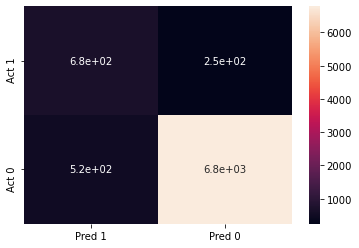

In [29]:
cm_DTminmax = confusion_matrix(y_test_dummy, y_pred_dummy_DTminmax, labels=[1, 0]) 
df_cm_DTminmax = pd.DataFrame(cm_DTminmax, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df_cm_DTminmax, annot=True)

In [30]:
roc_auc_score(y_test_dummy, y_pred_dummy_DTminmax)

0.8316155832822303

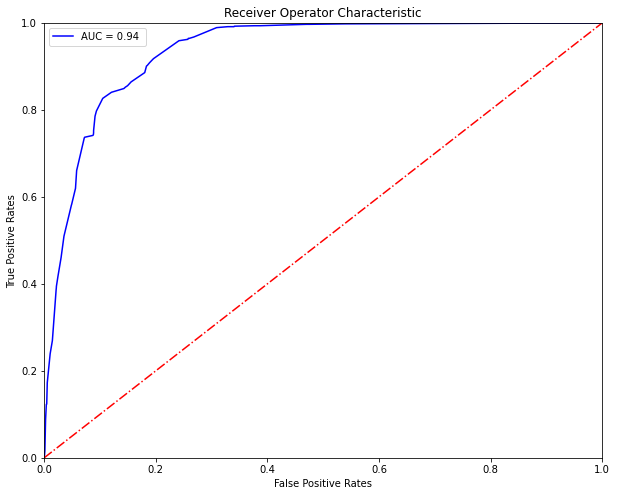

In [31]:
probs = model_dummyDT2.predict_proba(X_test_minmaxscaled)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test_dummy, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [32]:
model_dummyDT2.best_params_

{'max_depth': 6,
 'max_features': 0.7,
 'min_samples_leaf': 10,
 'min_samples_split': 23}

In [33]:
model_dummyDT2.best_score_

0.913080356569513

In [34]:
with open('recall_biased_model', 'wb') as ML:
    pickle.dump(model_dummyDT2, ML)

## Kesimpulan Akhir
### 1. Ada dua model yang didapatkan, precision biased dan recall biased. Kedua model tersebut memiliki nilai precision, recall, F1-score, serta AUC-ROC untuk 'y' bernilai '1' ('y' = 'yes') di atas 0.5. Namun, untuk mendapatkan nasabah sebanyak-banyaknya, recall biased model lebih cenderung digunakan daripada precision biased dengan asumsi pengeluaran marketing (biaya telepon per bulan) lebih kecil daripada pemasukan deposito nasabah bulanan.
### 2. Profil nasabah yang diprioritaskan : 
#### 2.1 Berprofesi Admin, Management, dan nasabah yang telah pensiun (Retired)
#### 2.2 Berstatus pendidikan University Degree, Proffesional Course, dan High School
#### 2.3 Tidak ada kredit yang default ("default" = "no")
#### 2.4 Memiliki telepon seluler yang dapat dihubungi ("contact" = "celluler")
#### 2.5 Memiliki hasil sukses dari campaign marketing sebelumnya ("poutcome" = "yes")
### 3. Walaupun persentase keberhasilan marketing tergolong rendah (sekitar 11 %), tetapi nasabah/client yang telah dihubungi pada campaign marketing sebelumnya memiliki probabilitas yang lebih besar untuk menanam deposito di Bank (terutama nasabah dengan "poutcome" = "success") untuk periode campaign marketing masa kini. Namun, pihak Bank jangan terlalu banyak menghubungi nasabah/client yang sama karena dapat dianggap mengganggu/mengusik privasi nasabah/client tersebut dan Bank tetap aktif mencari nasabah baru yang berpotensial besar untuk menanamkan deposito di Bank.